In [979]:
# import sys 
# sys.path

In [980]:
# sys.path.append('/home/mia/anaconda3/lib/python3.9/site-packages')

In [981]:
#first installation
# !{sys.executable} -m pip install cleverminer==0.0.85

In [982]:
# upgrade to higher version
# !pip install --upgrade cleverminer

In [983]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cleverminer.cleverminer import cleverminer

In [984]:
df = pd.read_csv(('germany_housing_data_14.07.2020.csv'), index_col=0)

In [985]:
# first 5 rows
df.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


In [986]:
# types of columns
df.dtypes

Price                      float64
Type                        object
Living_space               float64
Lot                        float64
Usable_area                float64
Free_of_Relation            object
Rooms                      float64
Bedrooms                   float64
Bathrooms                  float64
Floors                     float64
Year_built                 float64
Furnishing_quality          object
Year_renovated             float64
Condition                   object
Heating                     object
Energy_source               object
Energy_certificate          object
Energy_certificate_type     object
Energy_consumption         float64
Energy_efficiency_class     object
State                       object
City                        object
Place                       object
Garages                    float64
Garagetype                  object
dtype: object

In [987]:
# rows & columns
df.shape

(10552, 25)

In [988]:
# missing values
df.isna().sum()

Price                         0
Type                        402
Living_space                  0
Lot                           0
Usable_area                4984
Free_of_Relation           3569
Rooms                         0
Bedrooms                   3674
Bathrooms                  1801
Floors                     2664
Year_built                  694
Furnishing_quality         2726
Year_renovated             5203
Condition                   323
Heating                     584
Energy_source              1227
Energy_certificate          755
Energy_certificate_type    3526
Energy_consumption         8119
Energy_efficiency_class    4819
State                         1
City                          1
Place                       290
Garages                    1960
Garagetype                 1960
dtype: int64

In [989]:
df.dropna(subset = ['City'], inplace=True)

In [990]:
df['City'].isna().sum()

0

In [991]:
# basic statistics on all columns
display(df.describe())

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
count,1.055100e+04,10551.000000,10551.000000,5568.000000,10551.000000,6877.000000,8750.000000,7888.000000,9857.000000,5349.000000,2433.000000,8592.000000
mean,5.566938e+05,216.731123,1491.759720,134.300424,7.389394,4.169987,2.309029,2.283976,1958.817084,2010.706300,117.663111,2.698673
std,6.087692e+05,172.426362,8582.762176,188.814089,5.378211,2.577318,1.742426,0.821288,55.959221,10.548651,54.023207,3.195068
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1300.000000,1900.000000,5.100000,1.000000
25%,2.500000e+05,130.000000,370.000000,48.000000,5.000000,3.000000,1.000000,2.000000,1935.000000,2006.000000,83.170000,1.000000
50%,4.050000e+05,177.000000,657.000000,80.000000,6.000000,4.000000,2.000000,2.000000,1971.000000,2015.000000,112.700000,2.000000
75%,6.550000e+05,250.000000,1047.000000,150.250000,8.000000,5.000000,3.000000,3.000000,1996.000000,2018.000000,146.000000,3.000000
max,1.300000e+07,5600.000000,547087.000000,4034.000000,170.000000,61.000000,44.000000,13.000000,2022.000000,2206.000000,503.940000,70.000000


## Atributes

In [992]:
colorblind_palette = sns.color_palette("colorblind")
sns.set(context='notebook', style='white', palette=colorblind_palette, 
        font='sans-serif', font_scale=1.5, color_codes=False)

### Type

<AxesSubplot:title={'center':'Type'}, xlabel='Type', ylabel='count'>

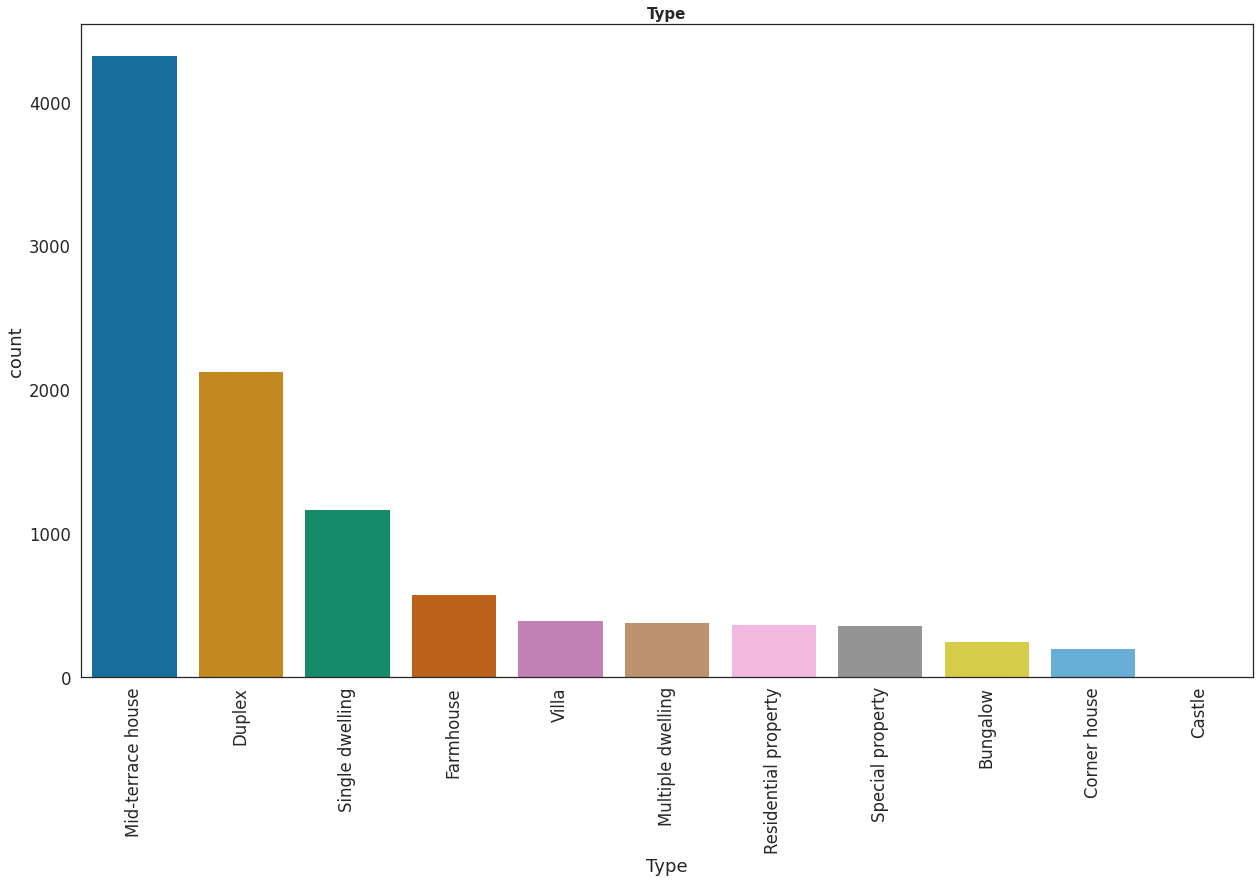

In [993]:
# the most used types
plt.figure(figsize=(21,12)) 
plt.xticks(rotation=90)
plt.title('Type', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Type'], data=df, palette=colorblind_palette, order=df['Type'].value_counts().iloc[-20:].index)

### Price

<AxesSubplot:title={'center':'Price'}, xlabel='Price'>

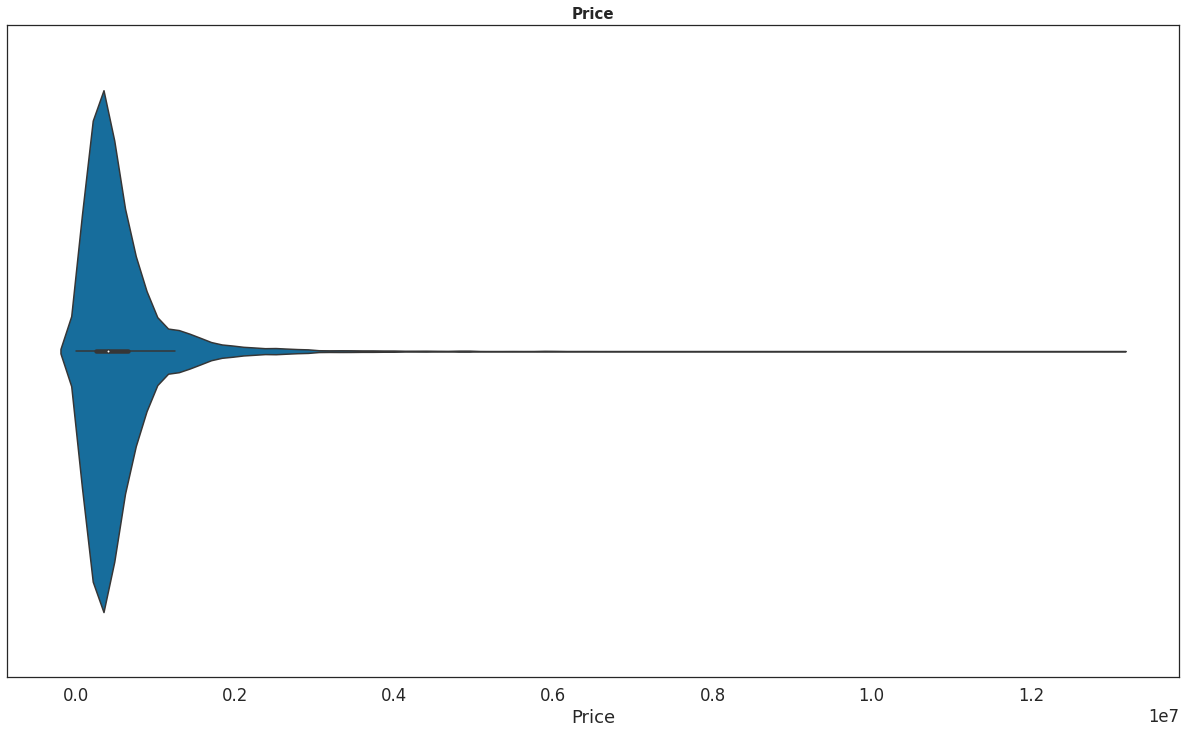

In [994]:
# plot price
plt.figure(figsize=(21,12)) 
plt.title('Price', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Price'], palette=colorblind_palette)

In [995]:
# lowest price
df['Price'].loc[~df['Price'].isnull()].iloc[0]

498000.0

In [996]:
# average price
df['Price'].mean()

556693.7764221402

In [997]:
# highest price
df['Price'].max()

13000000.0

In [998]:
# make equifrequent categories
price_intervals = ['299 and less', '300-550k', '550k+']
price_ef = pd.qcut(df['Price'], 3, precision=0, labels=price_intervals).astype(str)

<AxesSubplot:title={'center':'Price Equifrequent Categories'}, xlabel='Price', ylabel='count'>

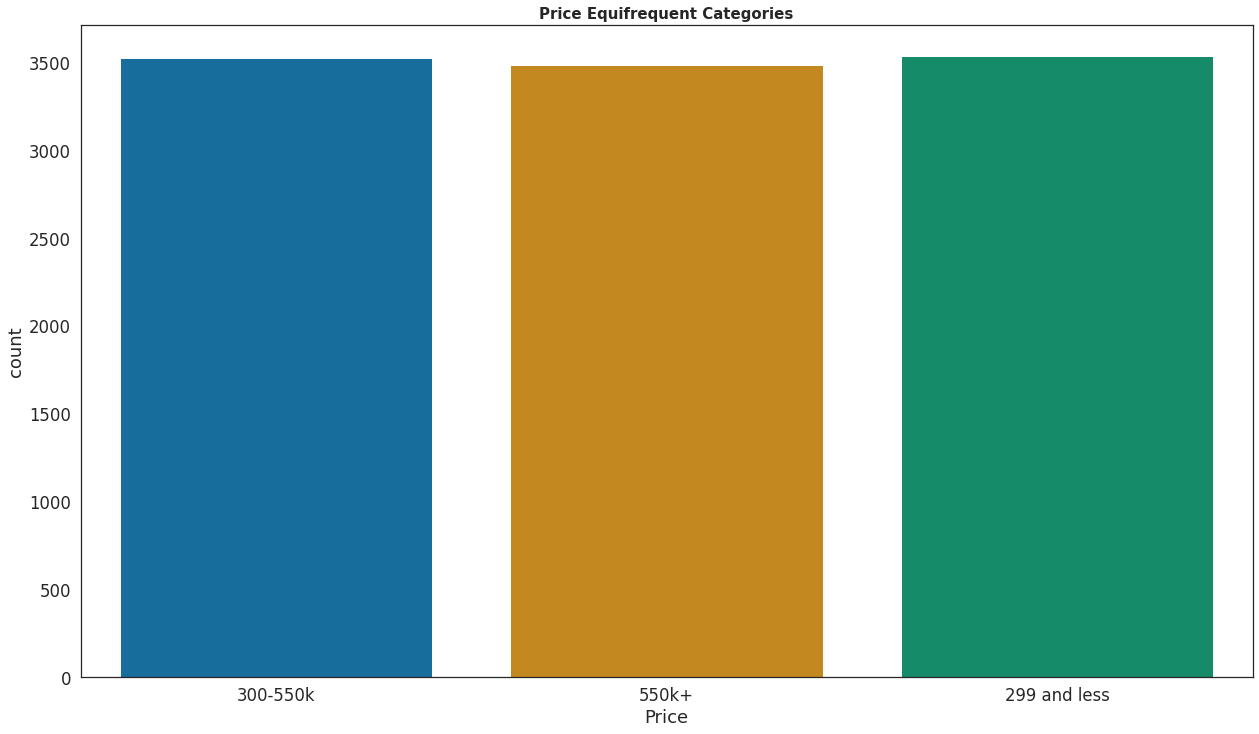

In [999]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Price Equifrequent Categories', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=price_ef, data=df, palette=colorblind_palette)

### Living Space

<AxesSubplot:title={'center':'Living Space'}, xlabel='Living_space'>

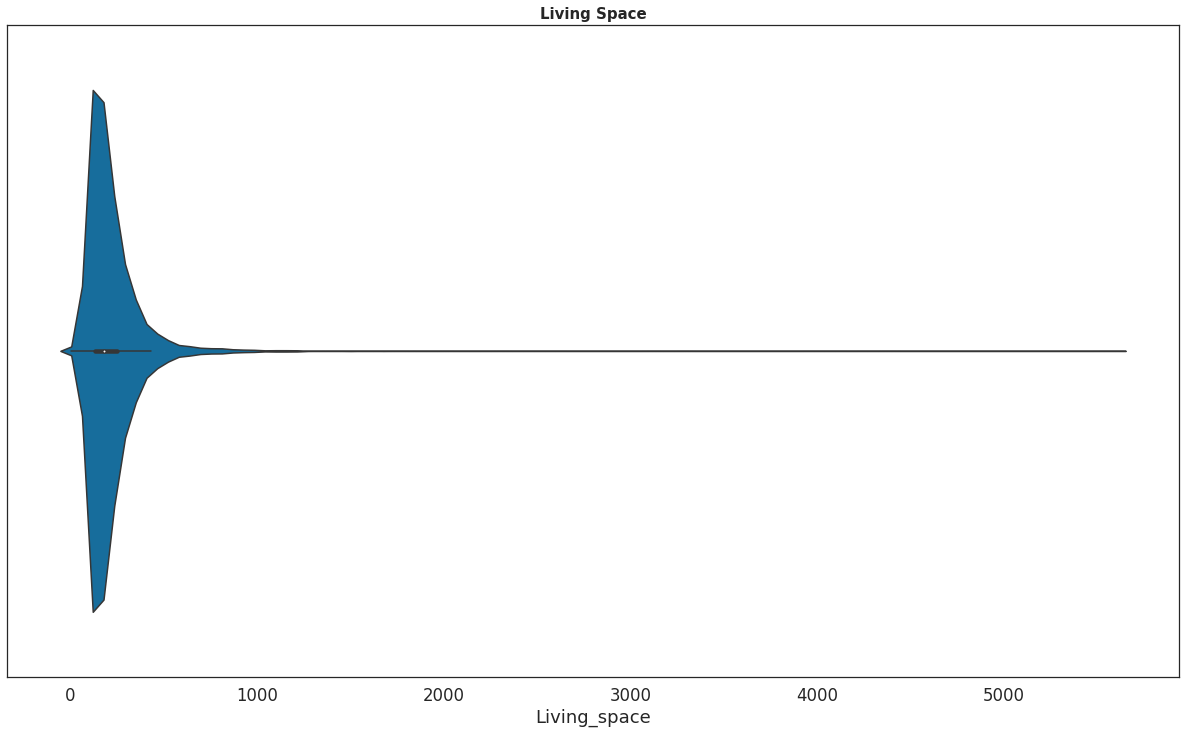

In [1000]:
# plot living space 
plt.figure(figsize=(21,12)) 
plt.title('Living Space', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Living_space'], palette=colorblind_palette)

In [1001]:
# average living space
df['Living_space'].mean()

216.7311231162919

In [1002]:
# ma equifrequent categories
living_space_ef = pd.qcut(df['Living_space'], 5, precision=0).astype(str)

<AxesSubplot:title={'center':'Living Space Equifrequent'}, xlabel='Living_space', ylabel='count'>

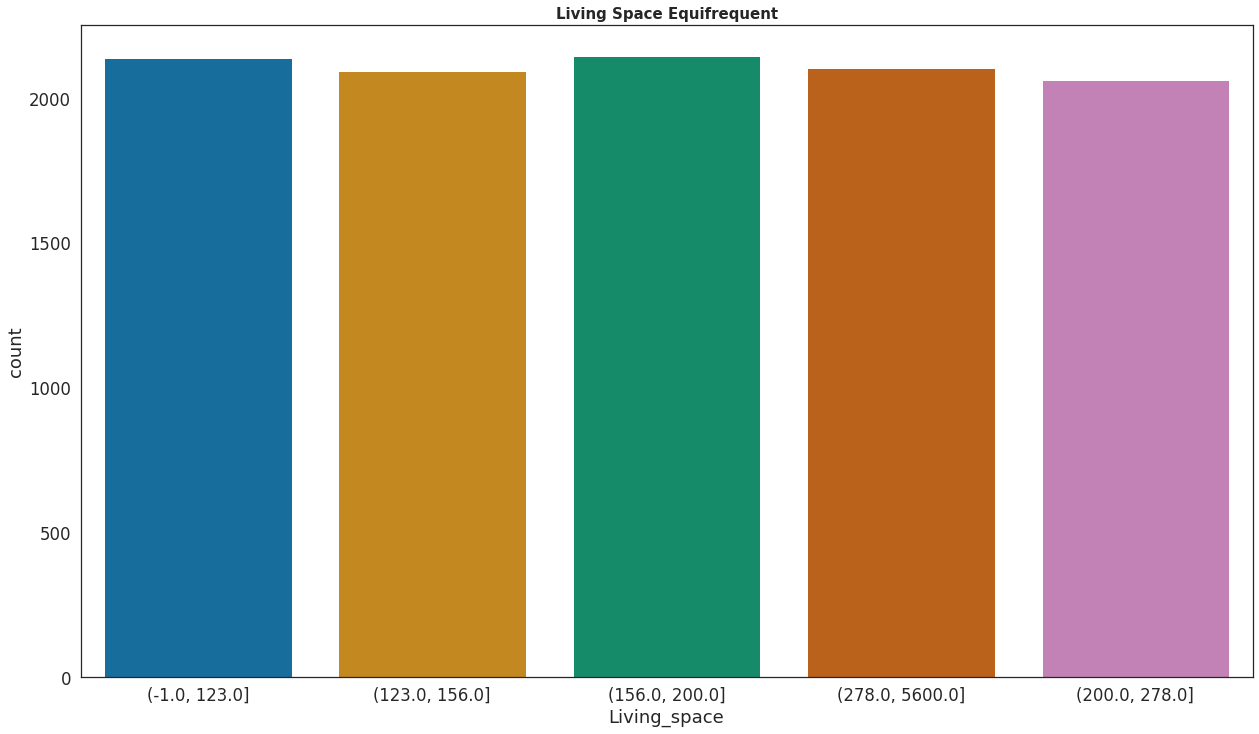

In [1003]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Living Space Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=living_space_ef, data=df, palette=colorblind_palette)

### Lot

<AxesSubplot:title={'center':'Lot'}, xlabel='Lot'>

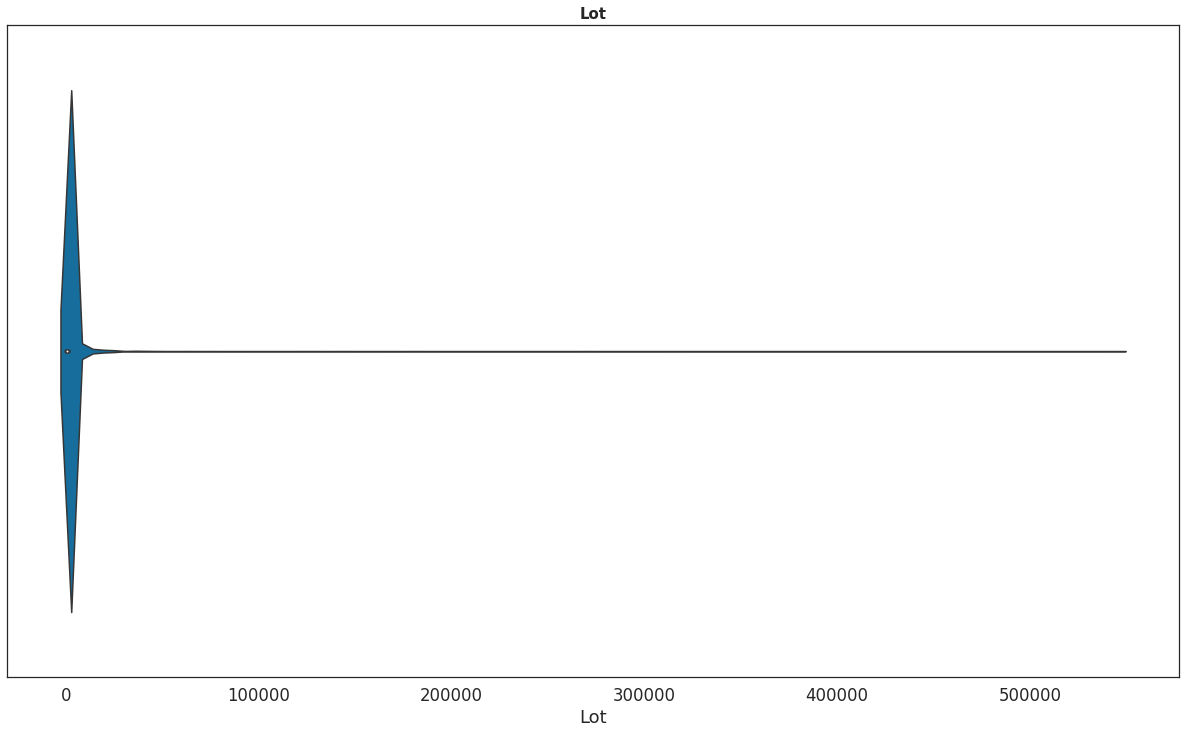

In [1004]:
# plot lot area
plt.figure(figsize=(21,12)) 
plt.title('Lot', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Lot'], palette=colorblind_palette)

In [1005]:
# make equifrequent categories
lot_ef = pd.qcut(df['Lot'], 5, precision=0)

<AxesSubplot:title={'center':'Lot Equifrequent'}, xlabel='Lot', ylabel='count'>

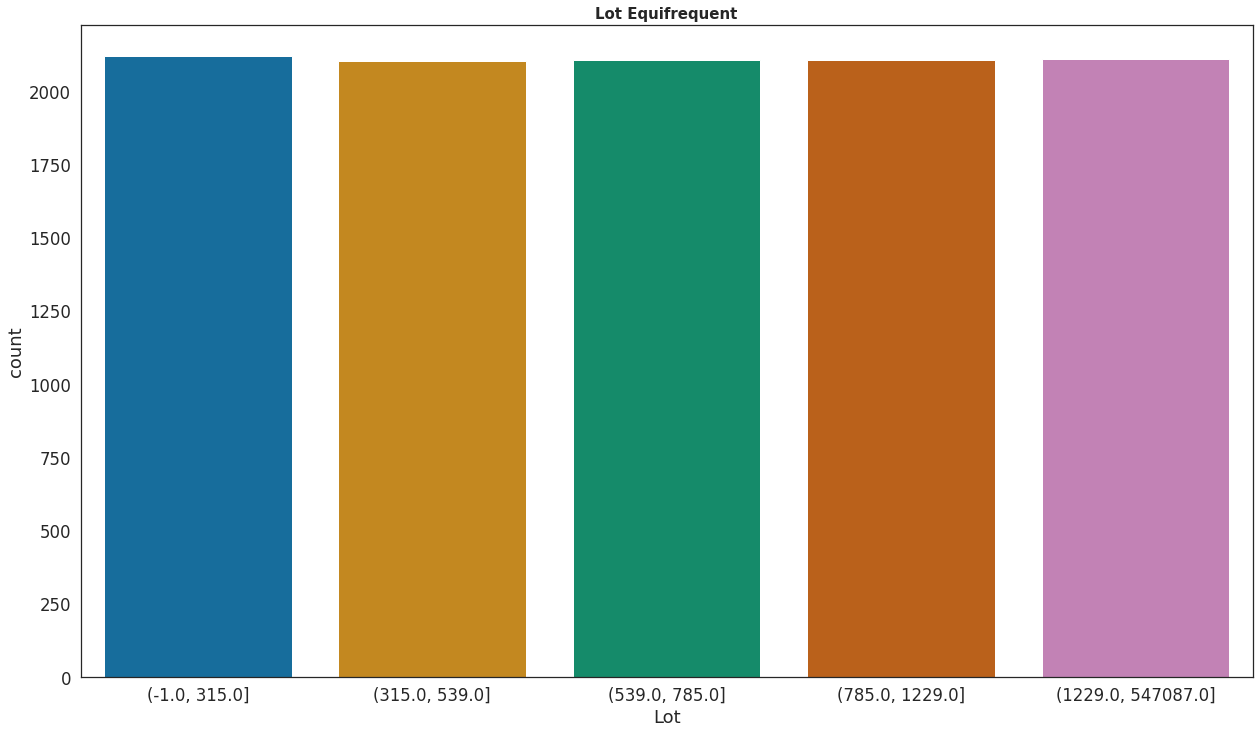

In [1006]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Lot Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=lot_ef, data=df, palette=colorblind_palette)

### Usable area 

<AxesSubplot:title={'center':'Usable area'}, xlabel='Usable_area'>

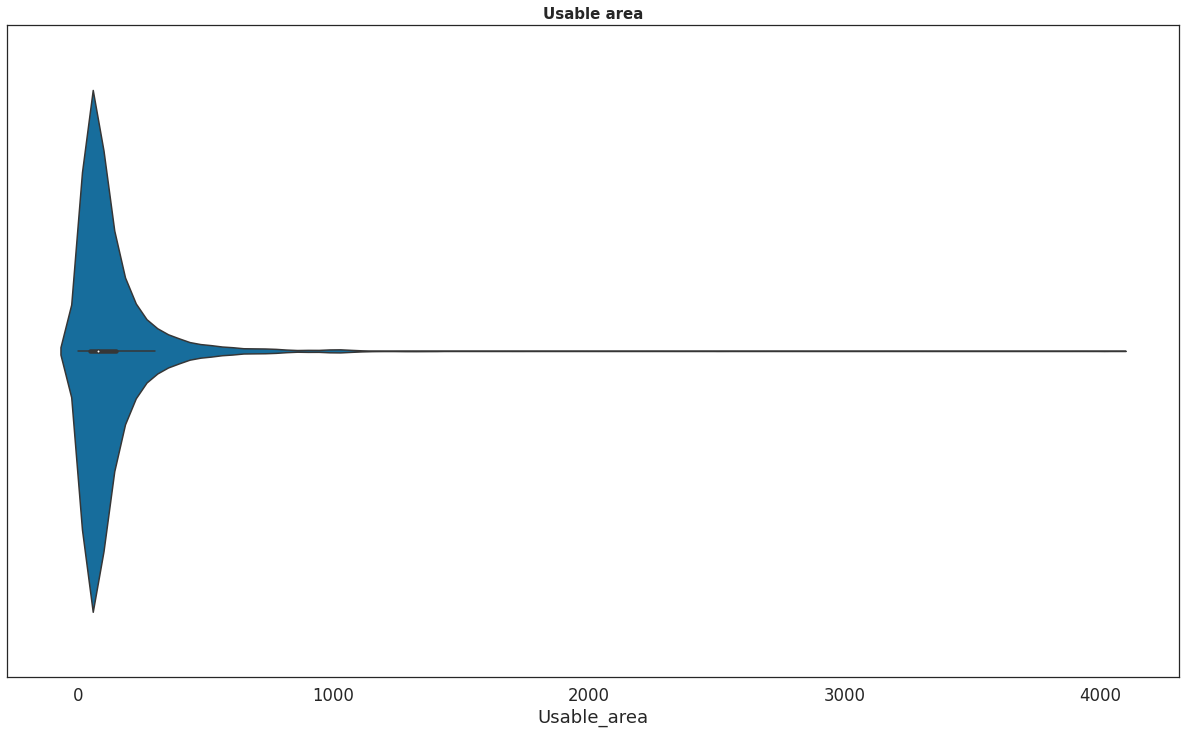

In [1007]:
# plot usable area
plt.figure(figsize=(21,12)) 
plt.title('Usable area', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Usable_area'], palette=colorblind_palette)

In [1008]:
# make equidistant & equifrequent categories
usable_area_ef = pd.qcut(df['Usable_area'], 5, precision=0)

<AxesSubplot:title={'center':'Usable area Equifrequent'}, xlabel='Usable_area', ylabel='count'>

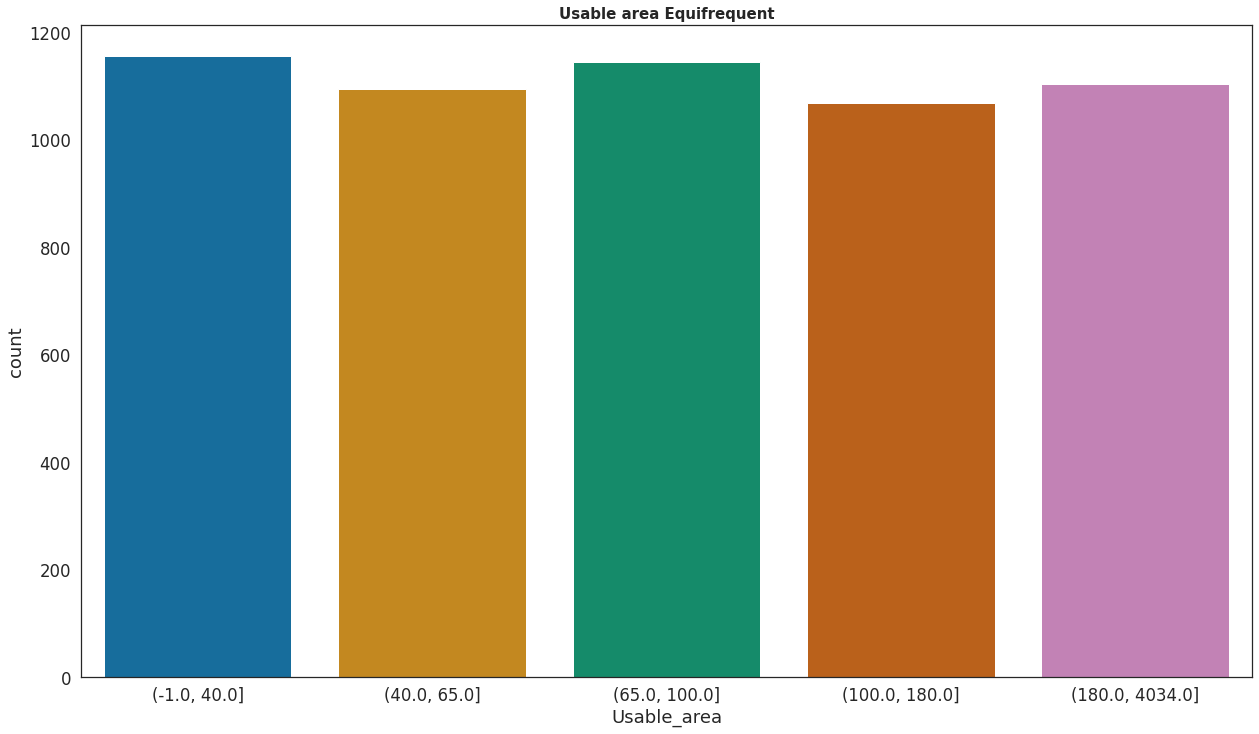

In [1009]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Usable area Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=usable_area_ef, data=df, palette=colorblind_palette)

### Free_of_Relation

<AxesSubplot:title={'center':'Free Of Relation'}, xlabel='Free_of_Relation', ylabel='count'>

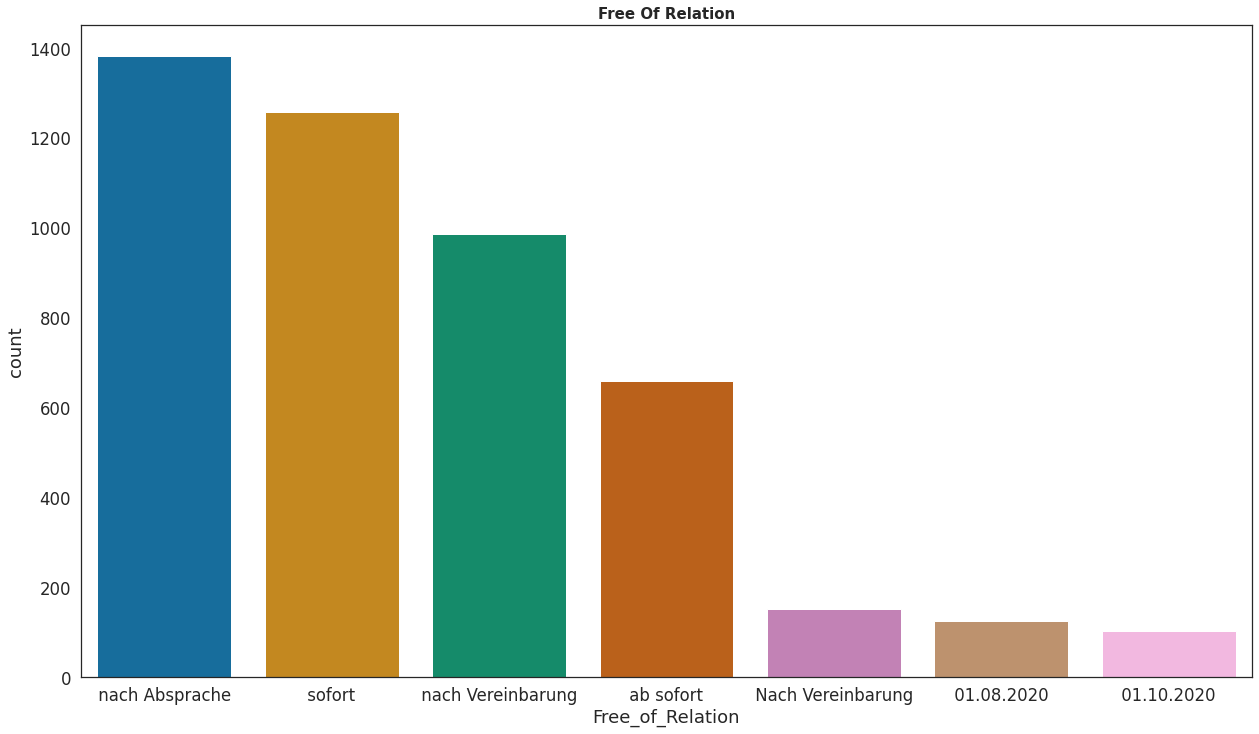

In [1010]:
# availability - the first 7 commonly used dates from which flat is available
plt.figure(figsize=(21,12)) 
plt.title('Free Of Relation', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Free_of_Relation'], data=df, palette=colorblind_palette, order=df['Free_of_Relation'].value_counts().iloc[:7].index)

### Rooms

<AxesSubplot:title={'center':'Rooms'}, xlabel='Rooms'>

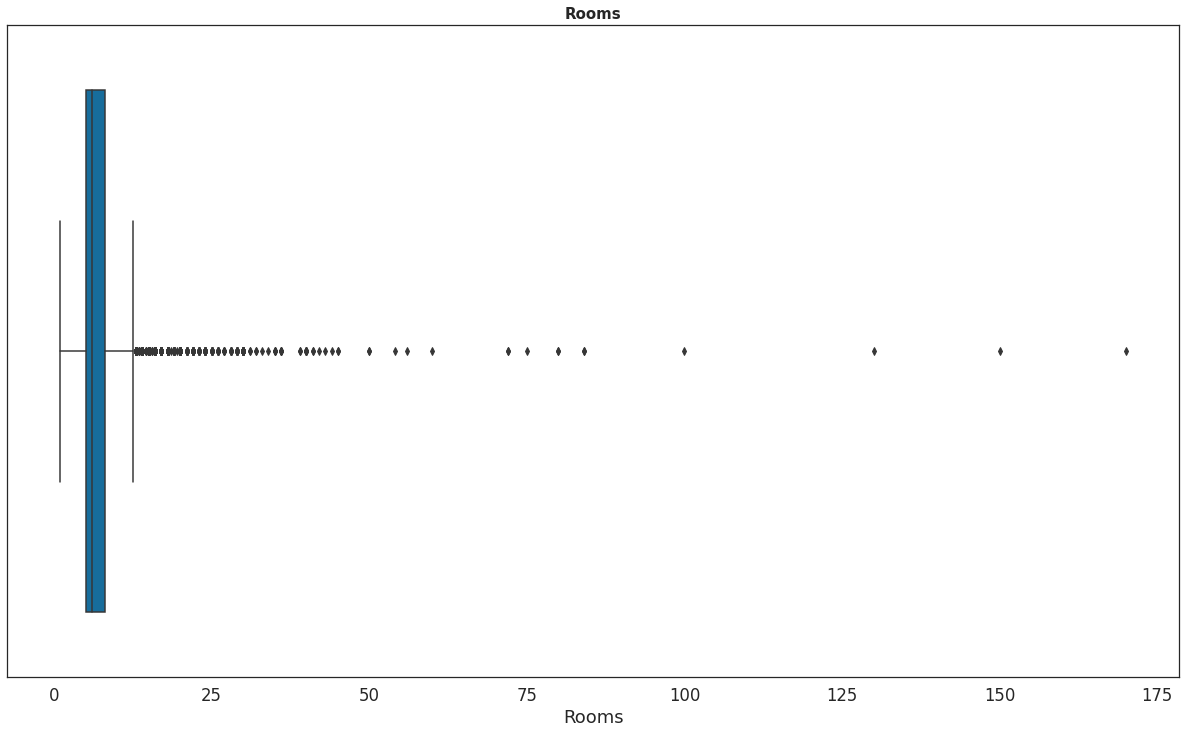

In [1011]:
# the most common amount of rooms
plt.figure(figsize=(21,12)) 
plt.title('Rooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Rooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Rooms'}, xlabel='Rooms', ylabel='count'>

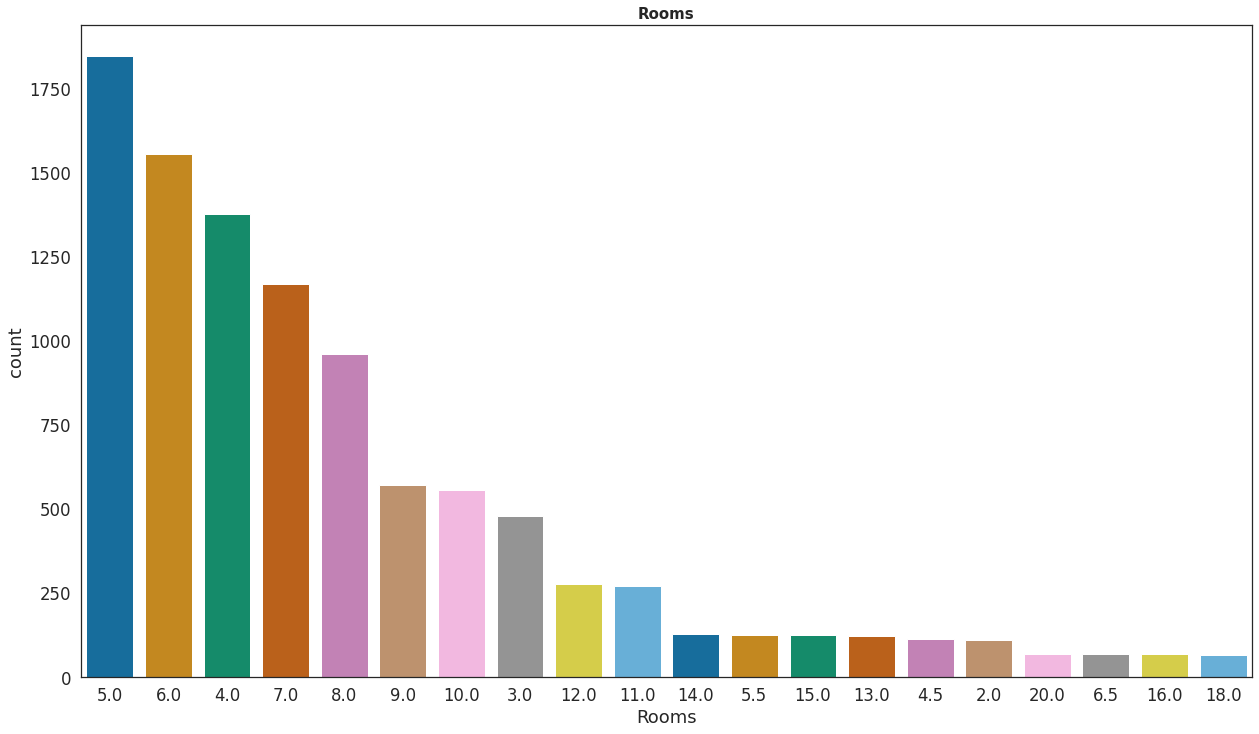

In [1012]:
# the most common amount of rooms - first 20 records
plt.figure(figsize=(21,12)) 
plt.title('Rooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Rooms'], palette=colorblind_palette, order=df['Rooms'].value_counts().iloc[:20].index)

### Bedrooms

<AxesSubplot:title={'center':'Bedrooms'}, xlabel='Bedrooms'>

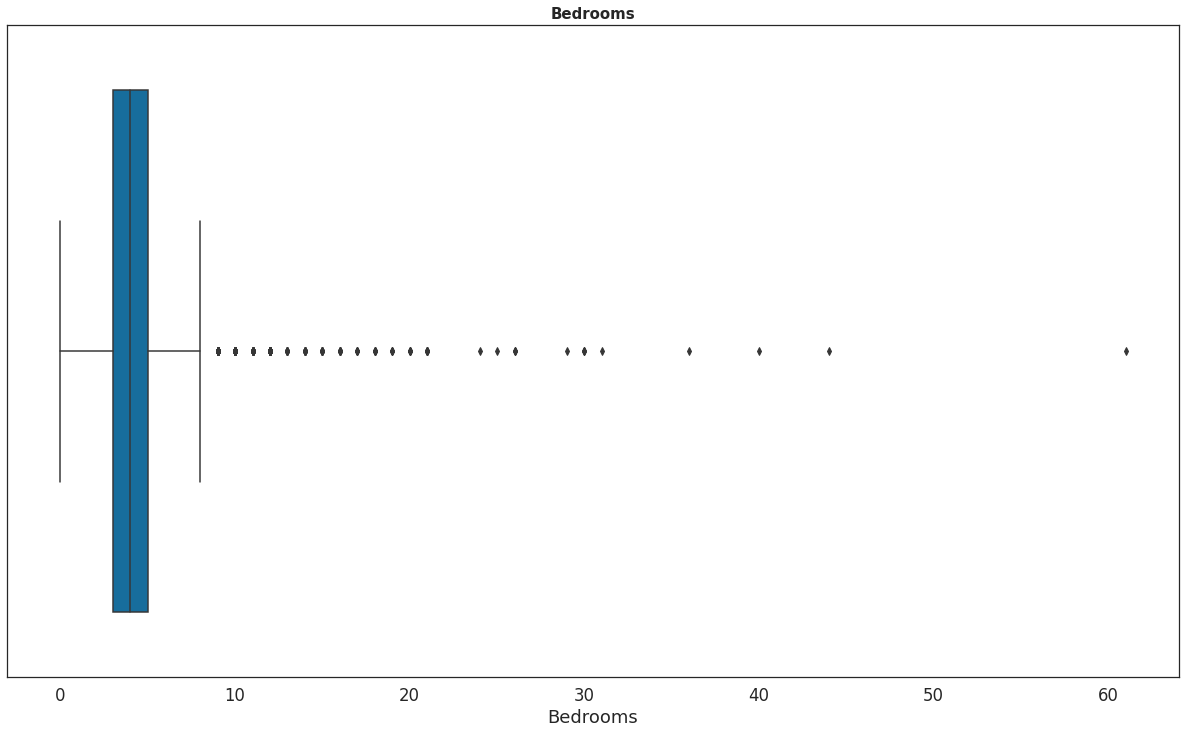

In [1013]:
# the most common amount of bedrooms
plt.figure(figsize=(21,12)) 
plt.title('Bedrooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Bedrooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Bedrooms'}, xlabel='Bedrooms', ylabel='count'>

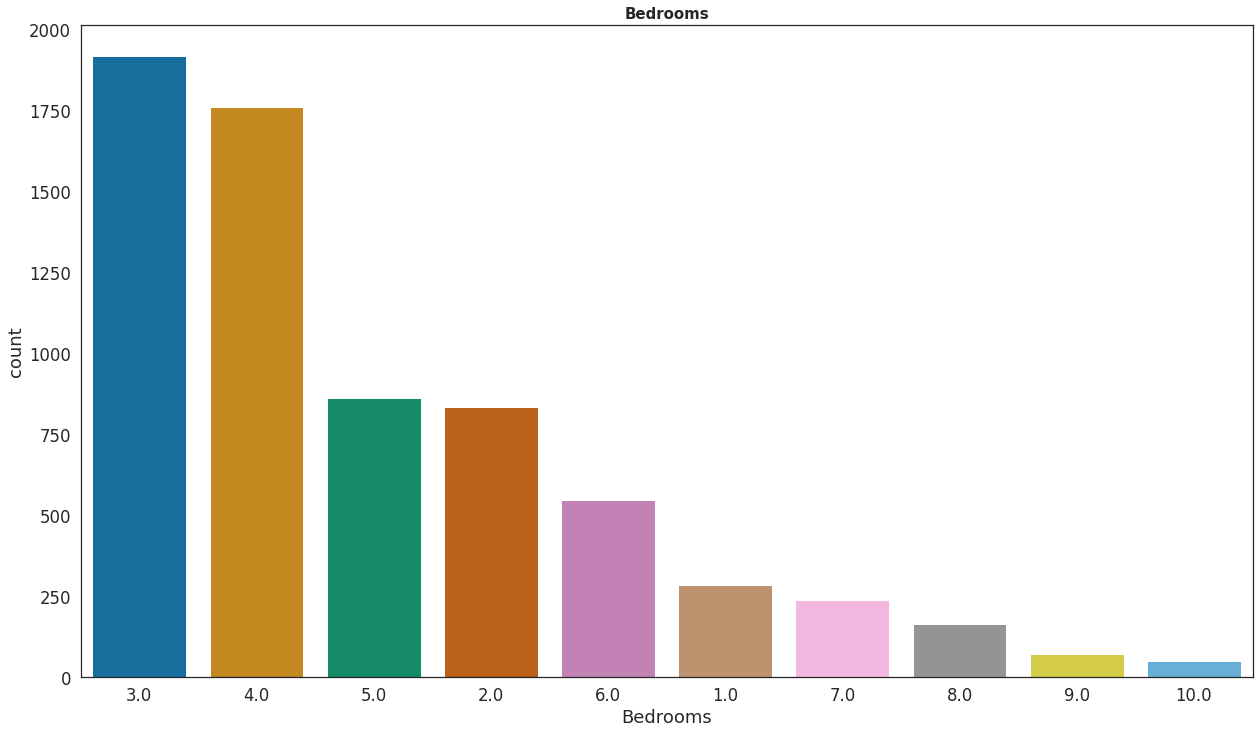

In [1014]:
# the most common amount of bedrooms - first 10 records
plt.figure(figsize=(21,12)) 
plt.title('Bedrooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Bedrooms'], palette=colorblind_palette, order=df['Bedrooms'].value_counts().iloc[:10].index)

### Bathrooms

<AxesSubplot:title={'center':'Bathrooms'}, xlabel='Bathrooms'>

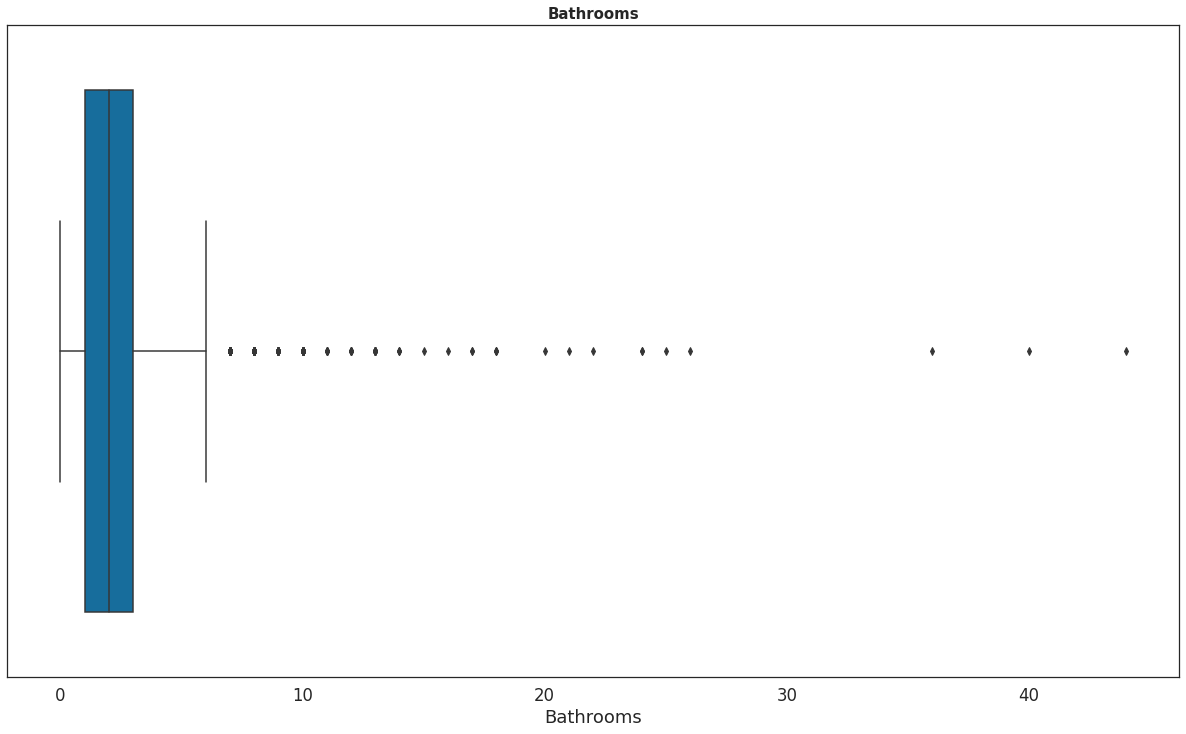

In [1015]:
# the most common amount of bathrooms
plt.figure(figsize=(21,12)) 
plt.title('Bathrooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Bathrooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Bathrooms'}, xlabel='Bathrooms', ylabel='count'>

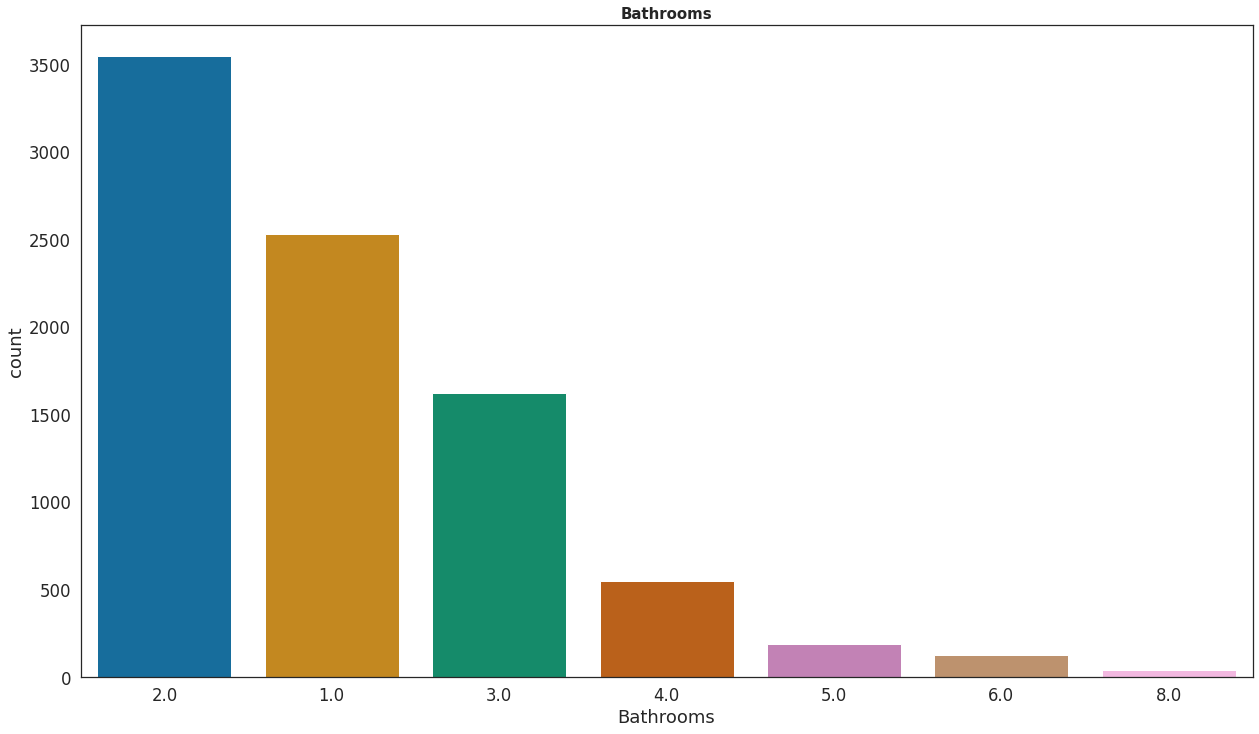

In [1016]:
# the most common amount of bathrooms - first 7 records
plt.figure(figsize=(21,12)) 
plt.title('Bathrooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Bathrooms'], palette=colorblind_palette, order=df['Bathrooms'].value_counts().iloc[:7].index)

### Floors

<AxesSubplot:title={'center':'Floors'}, xlabel='Floors', ylabel='count'>

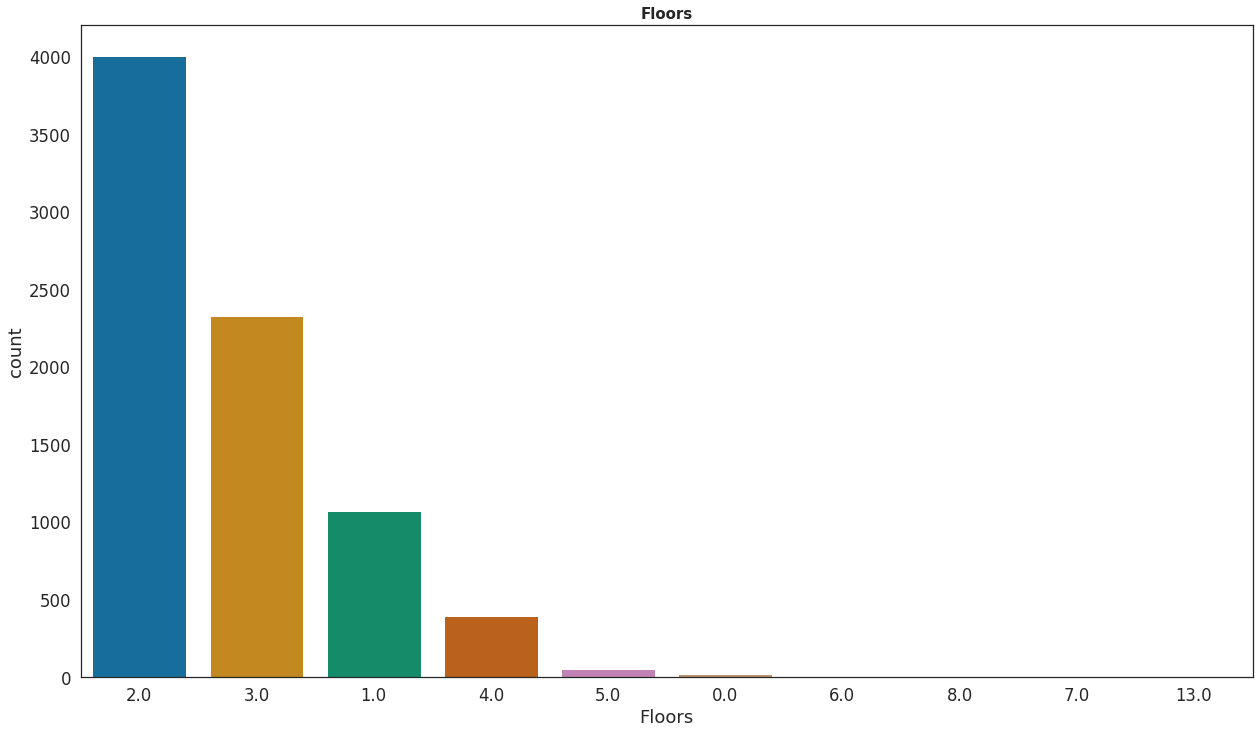

In [1017]:
# all floors
plt.figure(figsize=(21,12)) 
plt.title('Floors', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Floors'], data=df, palette=colorblind_palette, order=df['Floors'].value_counts().iloc[:].index)

### Year built

<AxesSubplot:title={'center':'Year Built'}, xlabel='Year_built'>

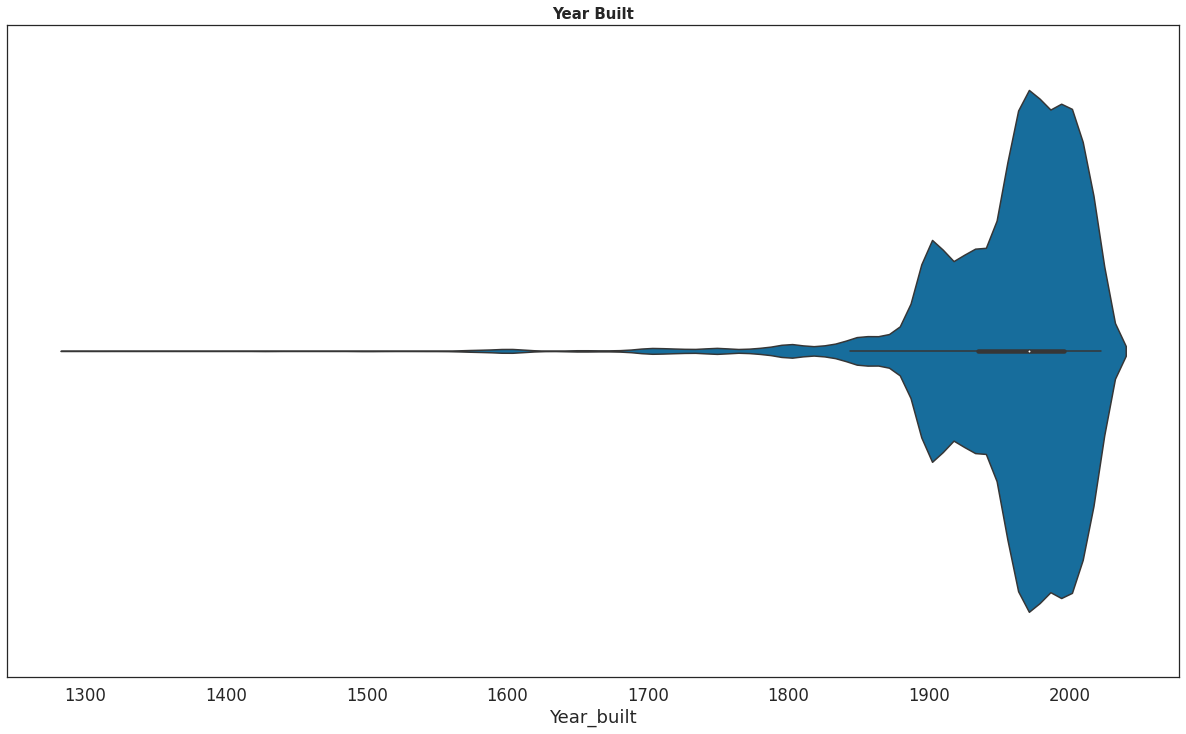

In [1018]:
# plot year built
plt.figure(figsize=(21,12)) 
plt.title('Year Built', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Year_built'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Year built'}, xlabel='Year_built', ylabel='count'>

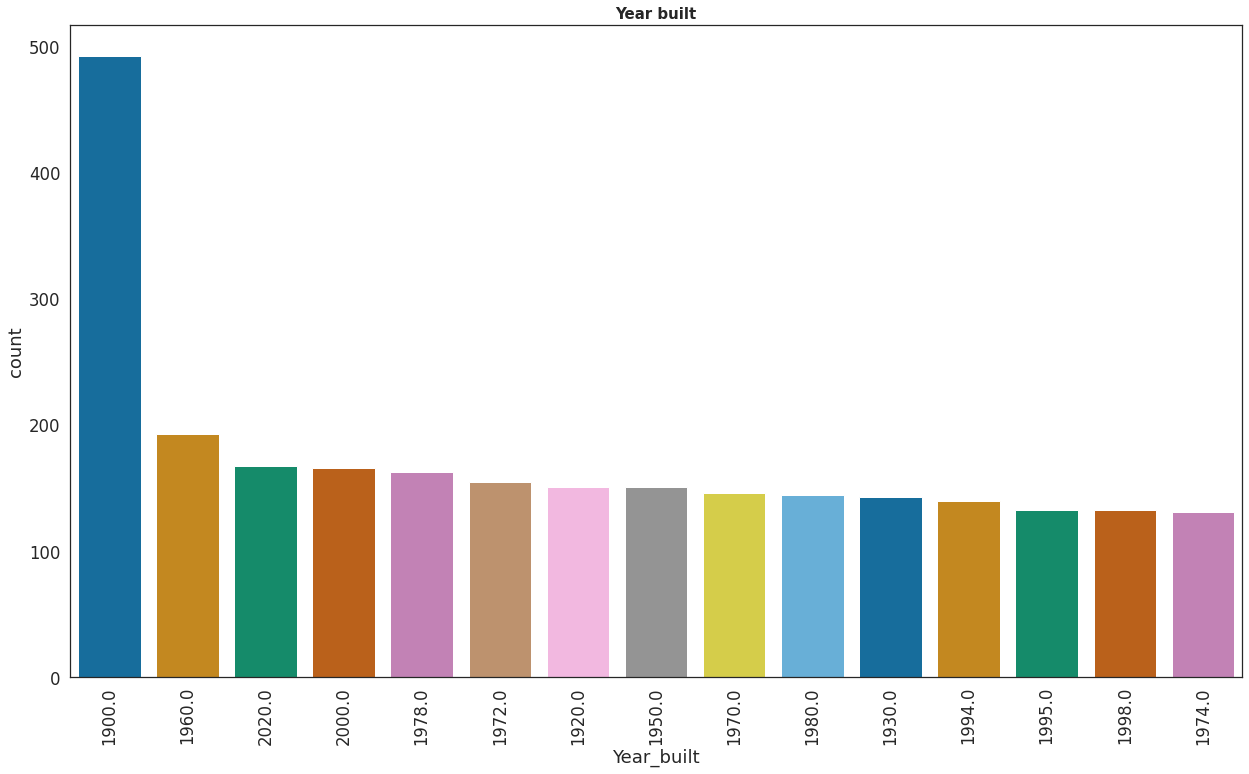

In [1019]:
# plot year built - first 15
plt.figure(figsize=(21,12)) 
plt.title('Year built', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Year_built'], palette=colorblind_palette, order=df['Year_built'].value_counts().iloc[:15].index)

### Furnishing_quality

<AxesSubplot:title={'center':'Furnishing quality'}, xlabel='Furnishing_quality', ylabel='count'>

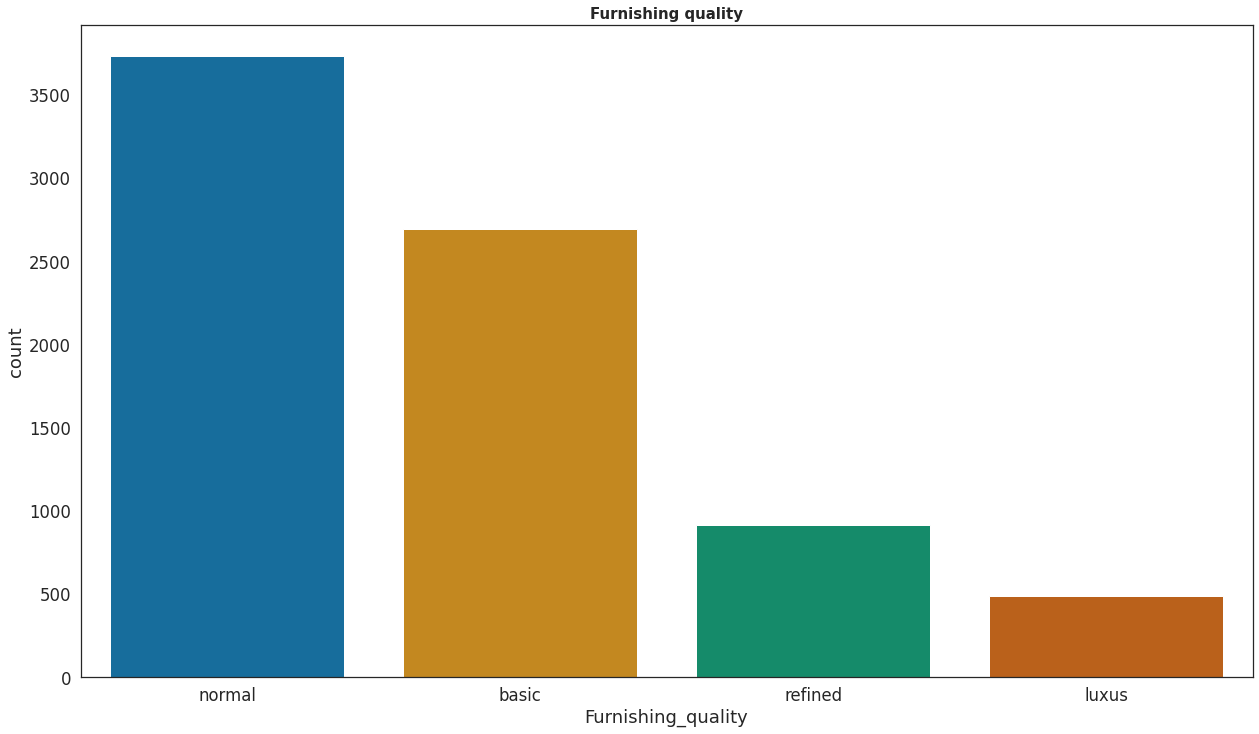

In [1020]:
# the most used types
plt.figure(figsize=(21,12)) 
plt.title('Furnishing quality', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Furnishing_quality'], data=df, palette=colorblind_palette)

### Year_renovated

<AxesSubplot:title={'center':'Year Built'}, xlabel='Year_built'>

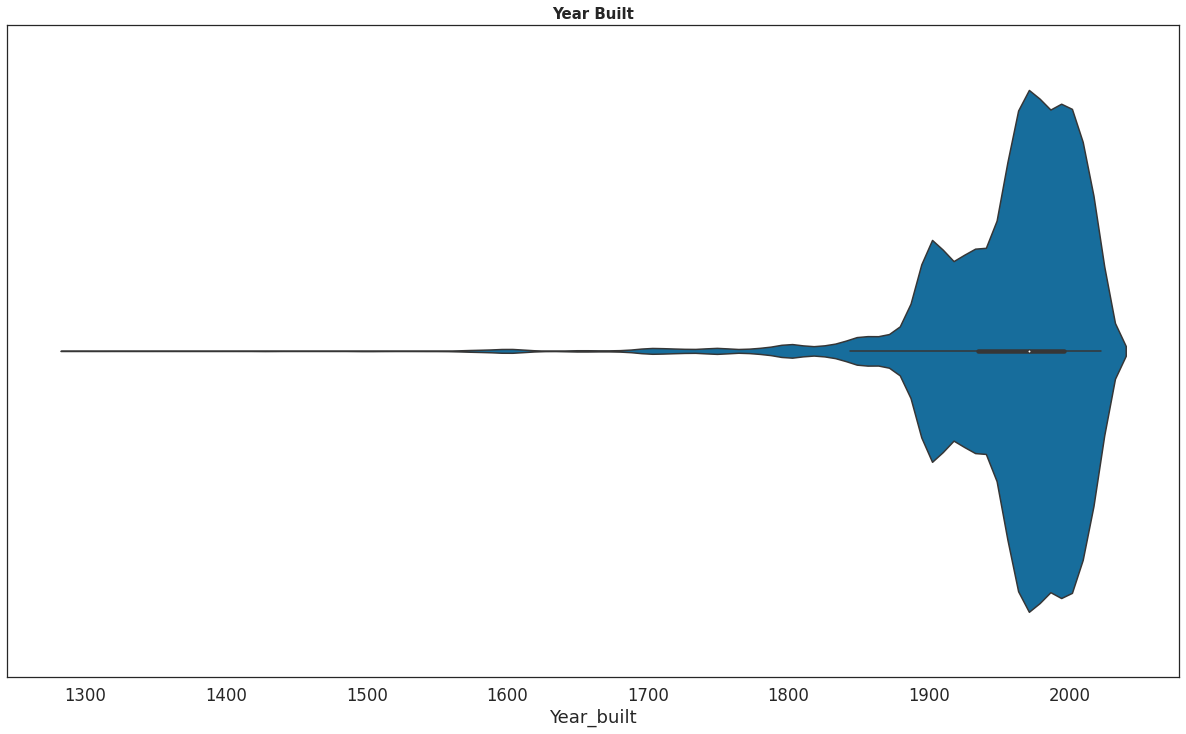

In [1021]:
# plot year renovated
plt.figure(figsize=(21,12)) 
plt.title('Year Built', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Year_built'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Year renovated'}, xlabel='Year_renovated', ylabel='count'>

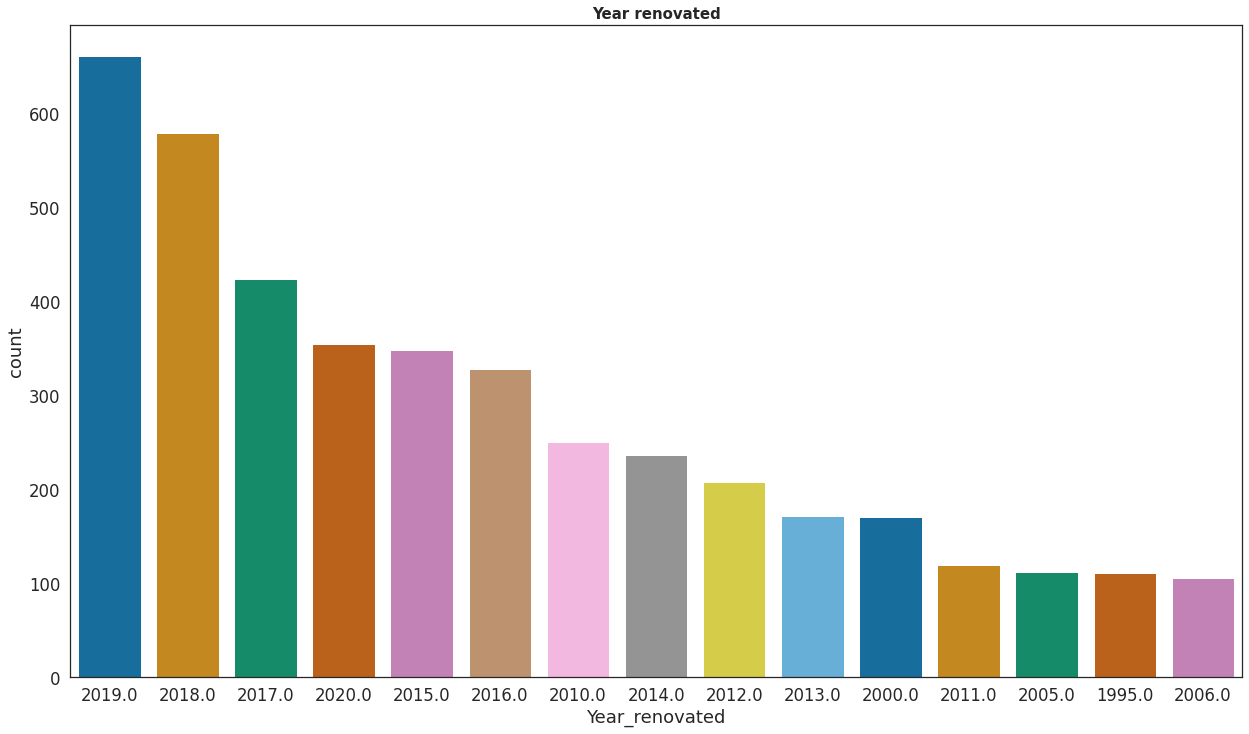

In [1022]:
# plot year renovated - first 15
plt.figure(figsize=(21,12)) 
plt.title('Year renovated', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Year_renovated'], palette=colorblind_palette, order=df['Year_renovated'].value_counts().iloc[:15].index)

### Condition

<AxesSubplot:title={'center':'Condition'}, xlabel='Condition', ylabel='count'>

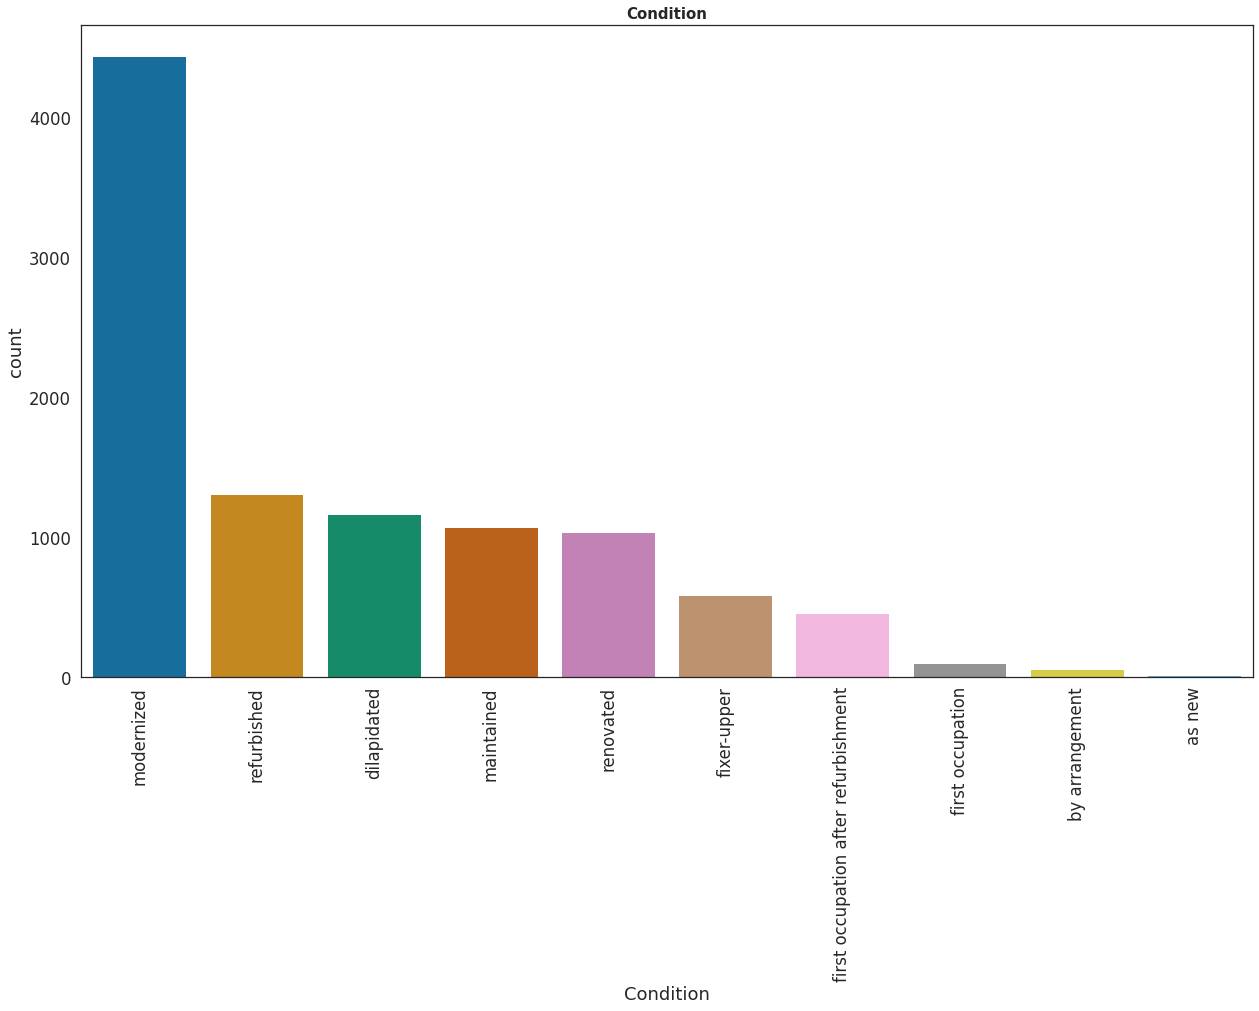

In [1023]:
# plot all condition types
plt.figure(figsize=(21,12)) 
plt.title('Condition', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Condition'], data=df, palette=colorblind_palette, order=df['Condition'].value_counts().iloc[:].index)

### Heating

<AxesSubplot:title={'center':'Heating'}, xlabel='Heating', ylabel='count'>

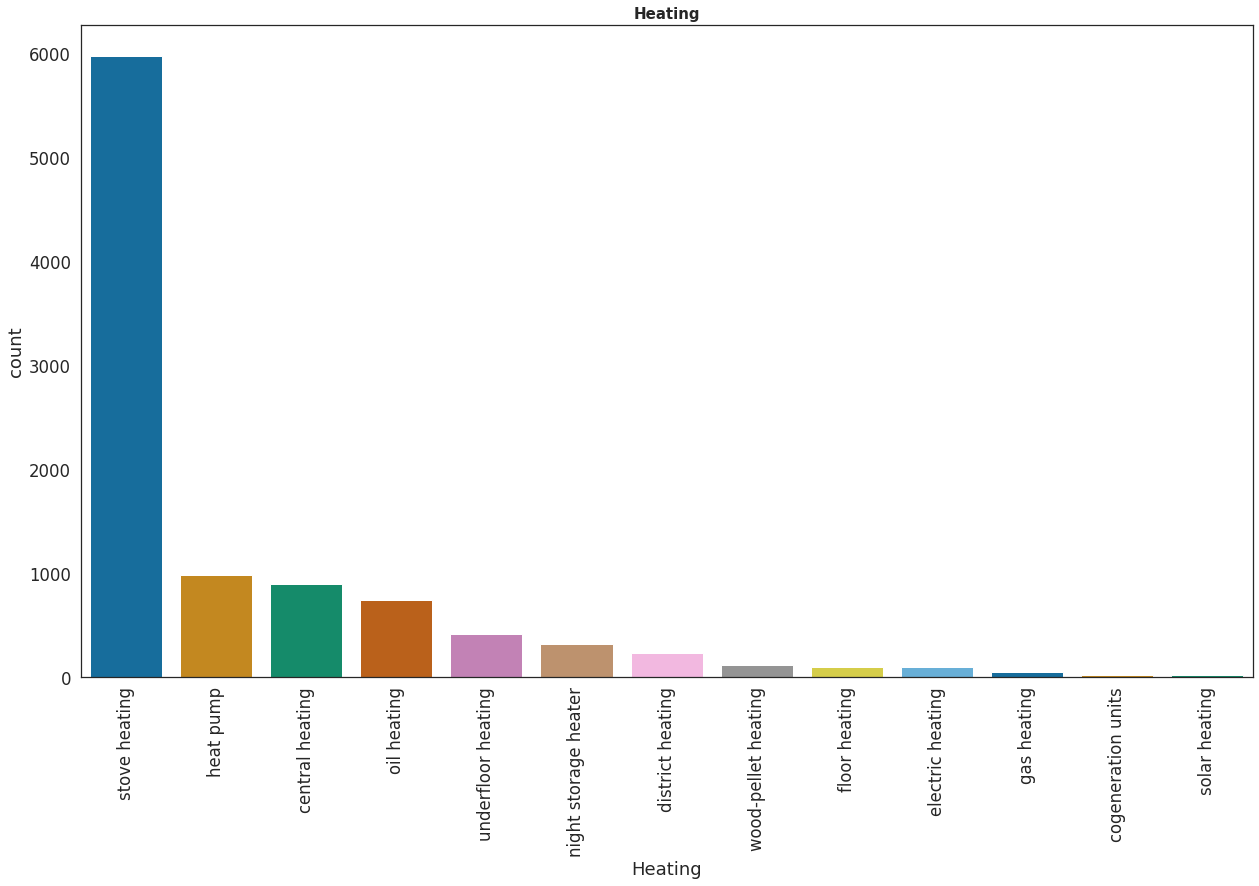

In [1024]:
# plot all heating types
plt.figure(figsize=(21,12)) 
plt.title('Heating', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Heating'], data=df, palette=colorblind_palette, order=df['Heating'].value_counts().iloc[:].index)

### Energy source

<AxesSubplot:title={'center':'Energy source'}, xlabel='Energy_source', ylabel='count'>

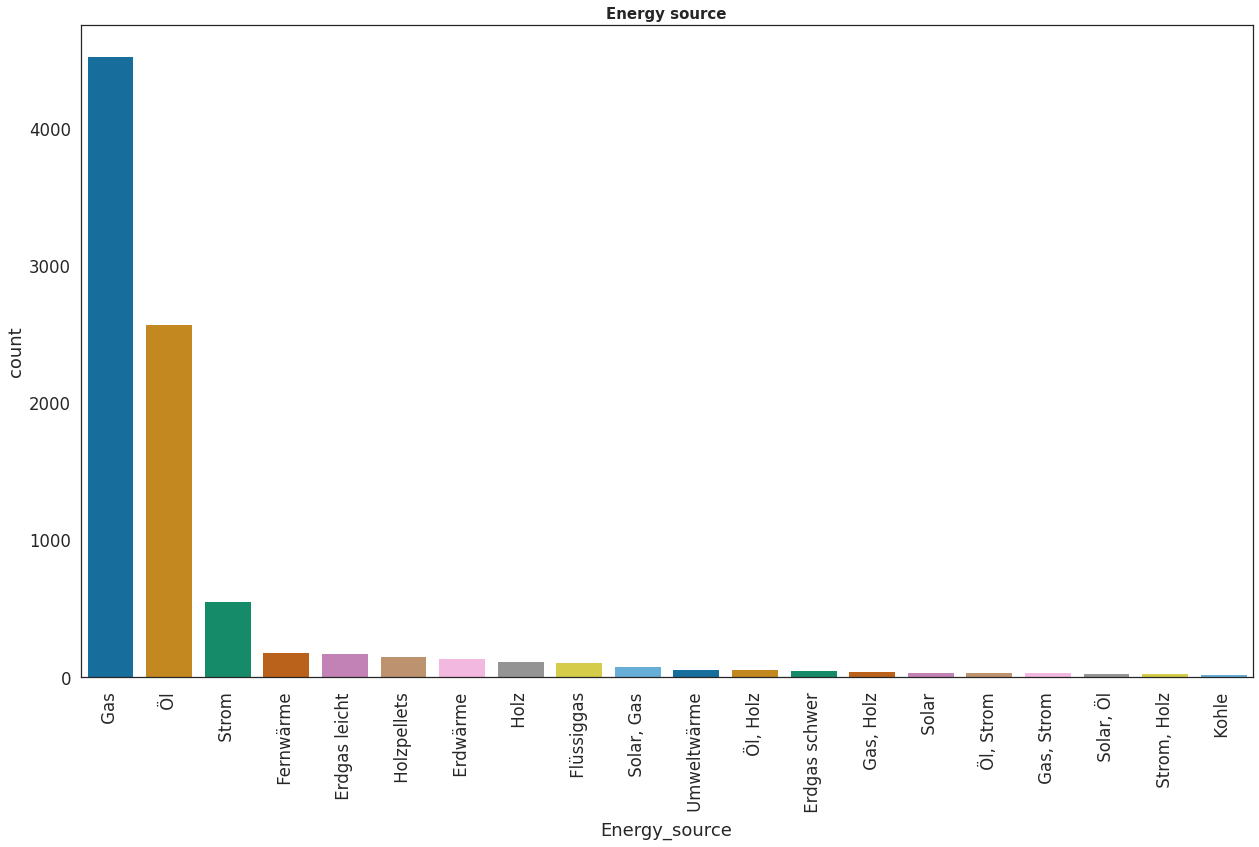

In [1025]:
# plot all energy sources - first 20
plt.figure(figsize=(21,12)) 
plt.title('Energy source', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_source'], data=df, palette=colorblind_palette, order=df['Energy_source'].value_counts().iloc[:20].index)

<AxesSubplot:title={'center':'Energy source'}, xlabel='Energy_source', ylabel='count'>

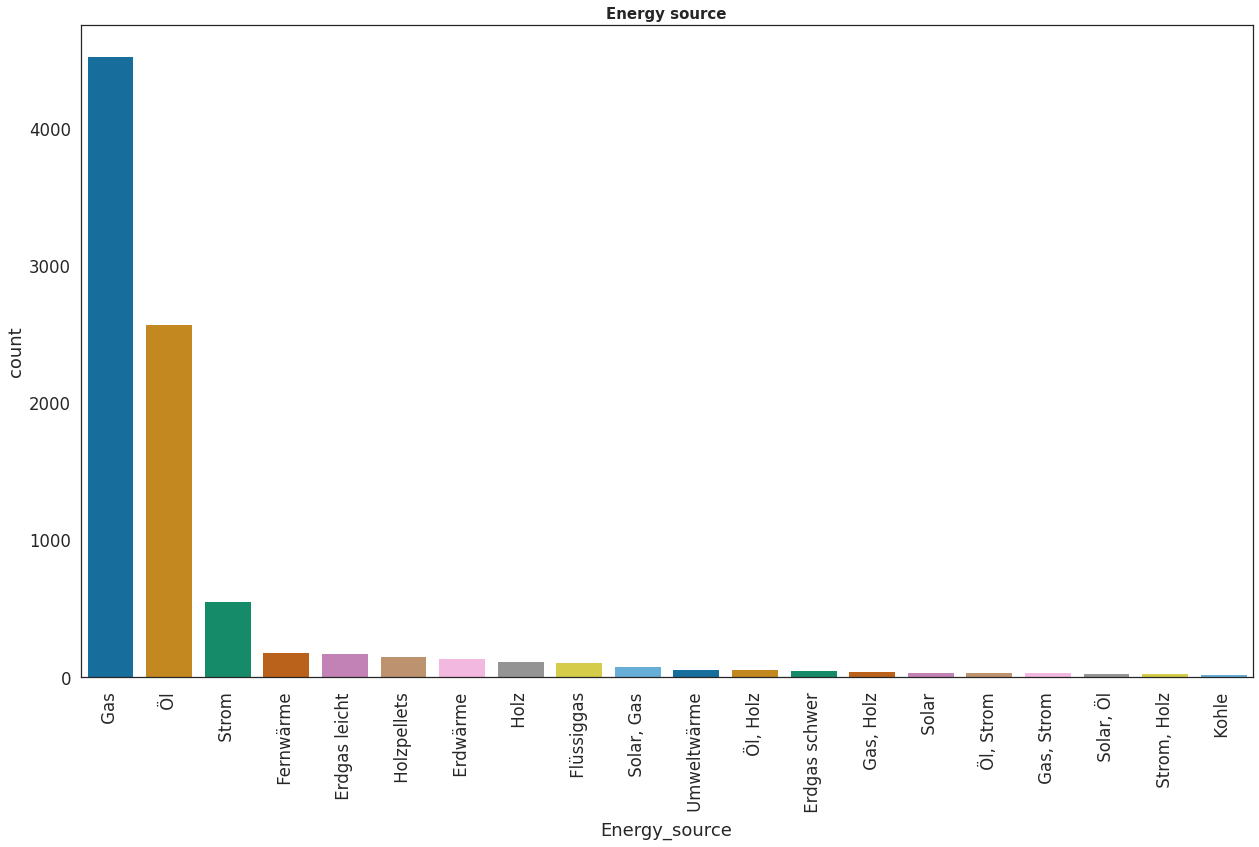

In [1026]:
# plot first 20 sources
plt.figure(figsize=(21,12)) 
plt.title('Energy source', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_source'], data=df, palette=colorblind_palette, order=df['Energy_source'].value_counts().iloc[:20].index)

### Energy certificate   

<AxesSubplot:title={'center':'Energy_certificate'}, xlabel='Energy_certificate', ylabel='count'>

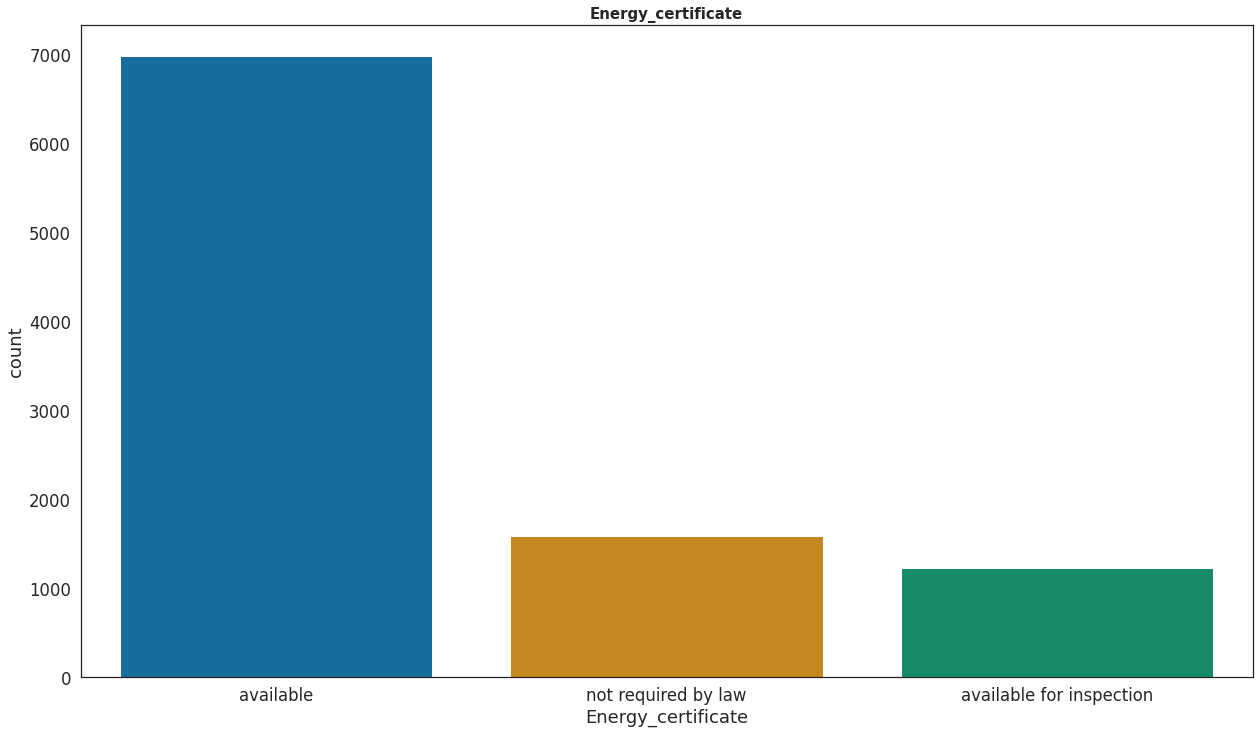

In [1027]:
# plot all energy certificates
plt.figure(figsize=(21,12)) 
plt.title('Energy_certificate', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_certificate'], data=df, palette=colorblind_palette)

### Energy certificate type 

<AxesSubplot:title={'center':'Energy_certificate_type'}, xlabel='Energy_certificate_type', ylabel='count'>

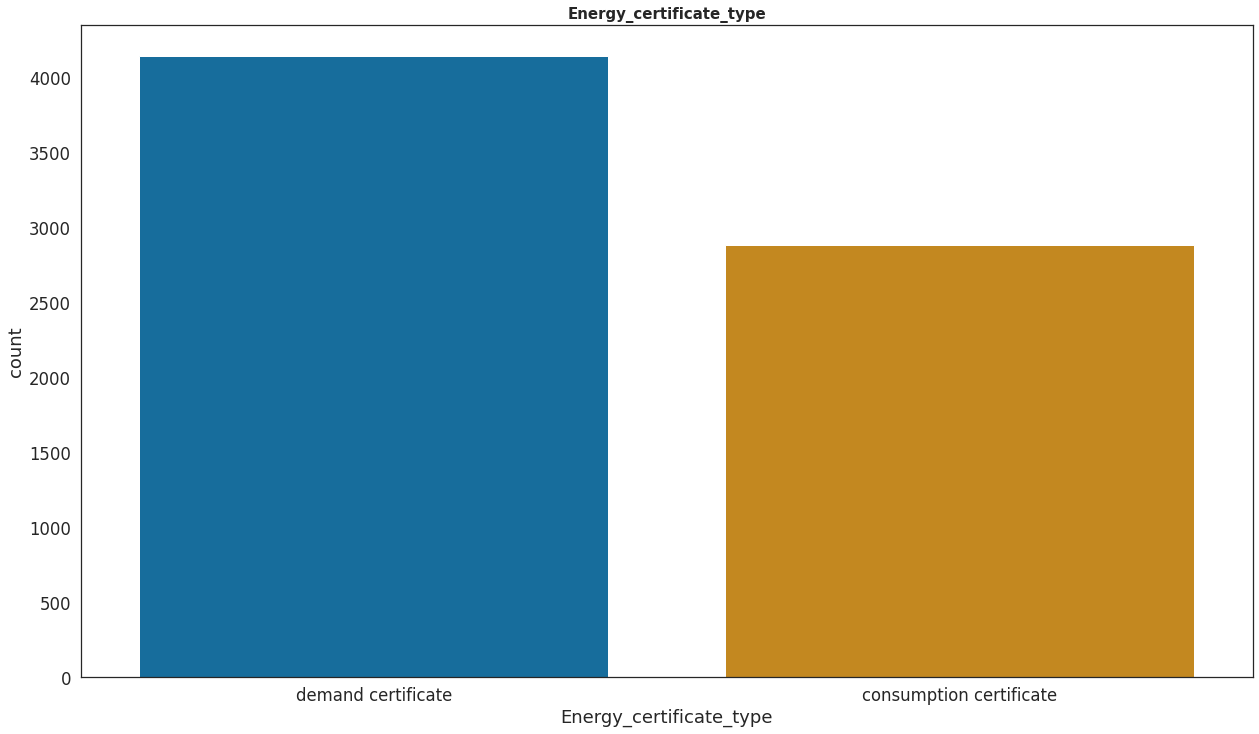

In [1028]:
# plot all energy certificate types
plt.figure(figsize=(21,12)) 
plt.title('Energy_certificate_type', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_certificate_type'], data=df, palette=colorblind_palette)

### Energy_consumption

<AxesSubplot:title={'center':'Energy consumption'}, xlabel='Energy_consumption'>

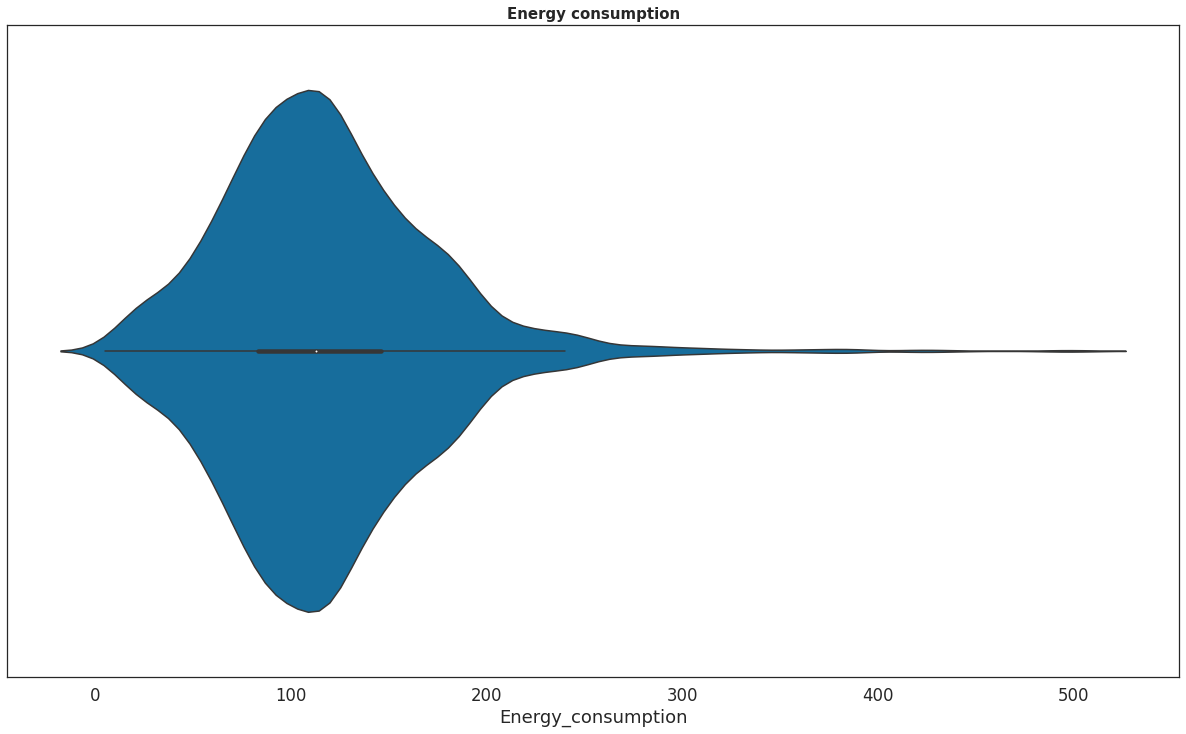

In [1029]:
# plot energy consumption
plt.figure(figsize=(21,12)) 
plt.title('Energy consumption', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Energy_consumption'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Energy consumption'}, xlabel='Energy_consumption', ylabel='count'>

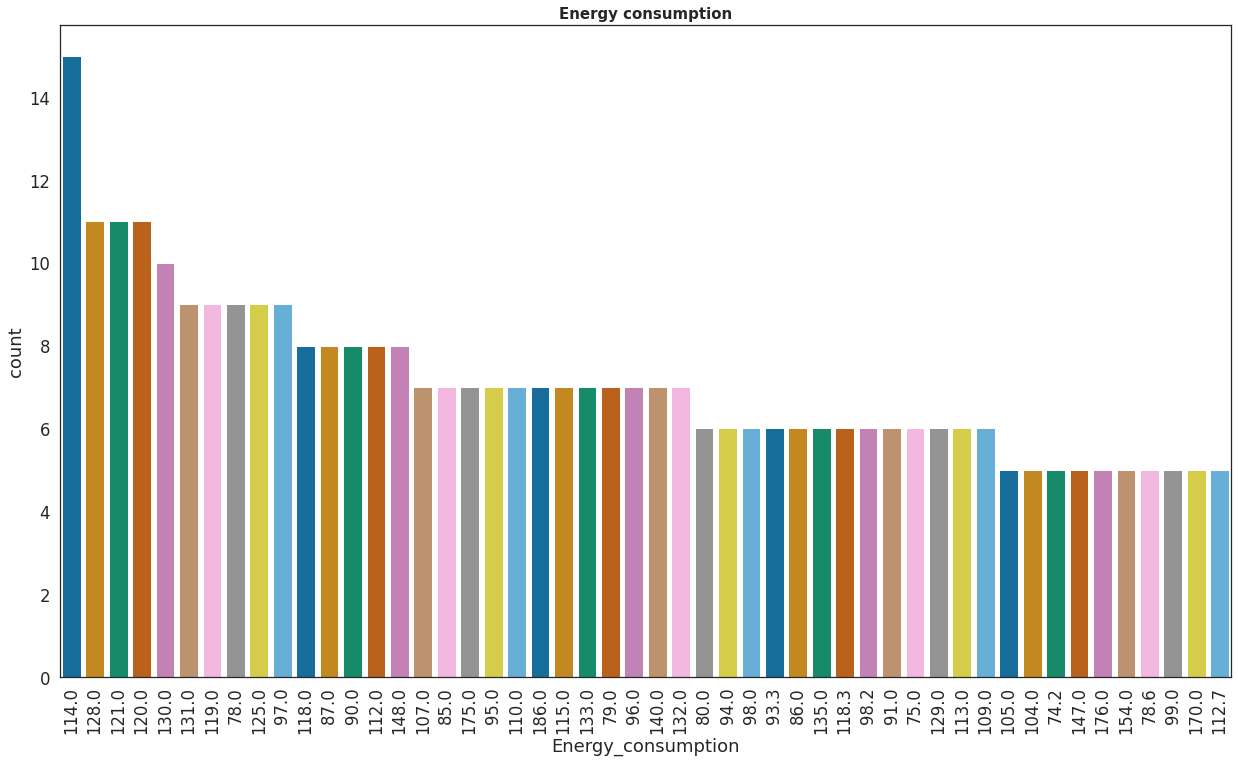

In [1030]:
# plot first 20 records
plt.figure(figsize=(21,12)) 
plt.title('Energy consumption', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_consumption'], data=df, palette=colorblind_palette, order=df['Energy_consumption'].value_counts().iloc[:50].index)

### Energy efficiency class

<AxesSubplot:title={'center':'Energy efficiency class'}, xlabel='Energy_efficiency_class', ylabel='count'>

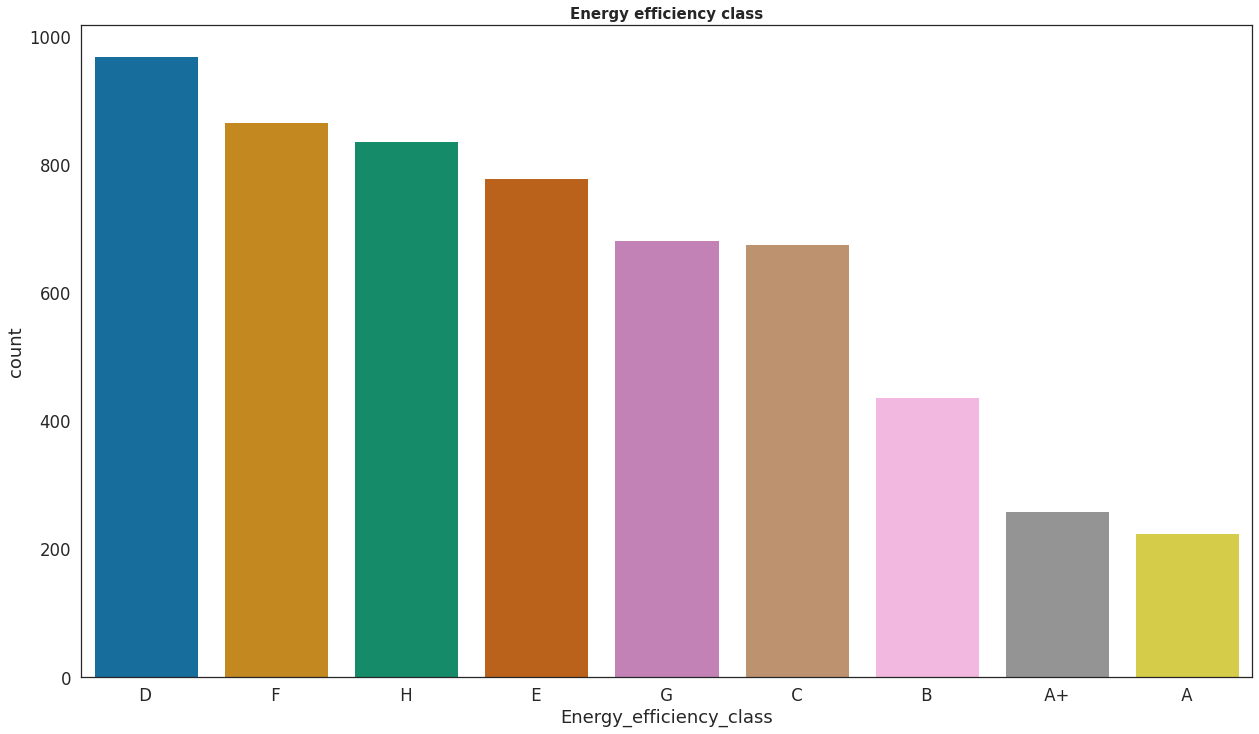

In [1031]:
# plot all energy efficience classes
plt.figure(figsize=(21,12)) 
plt.title('Energy efficiency class', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_efficiency_class'], data=df, palette=colorblind_palette, order=df['Energy_efficiency_class'].value_counts().iloc[:].index)

### State                       

<AxesSubplot:title={'center':'State'}, xlabel='State', ylabel='count'>

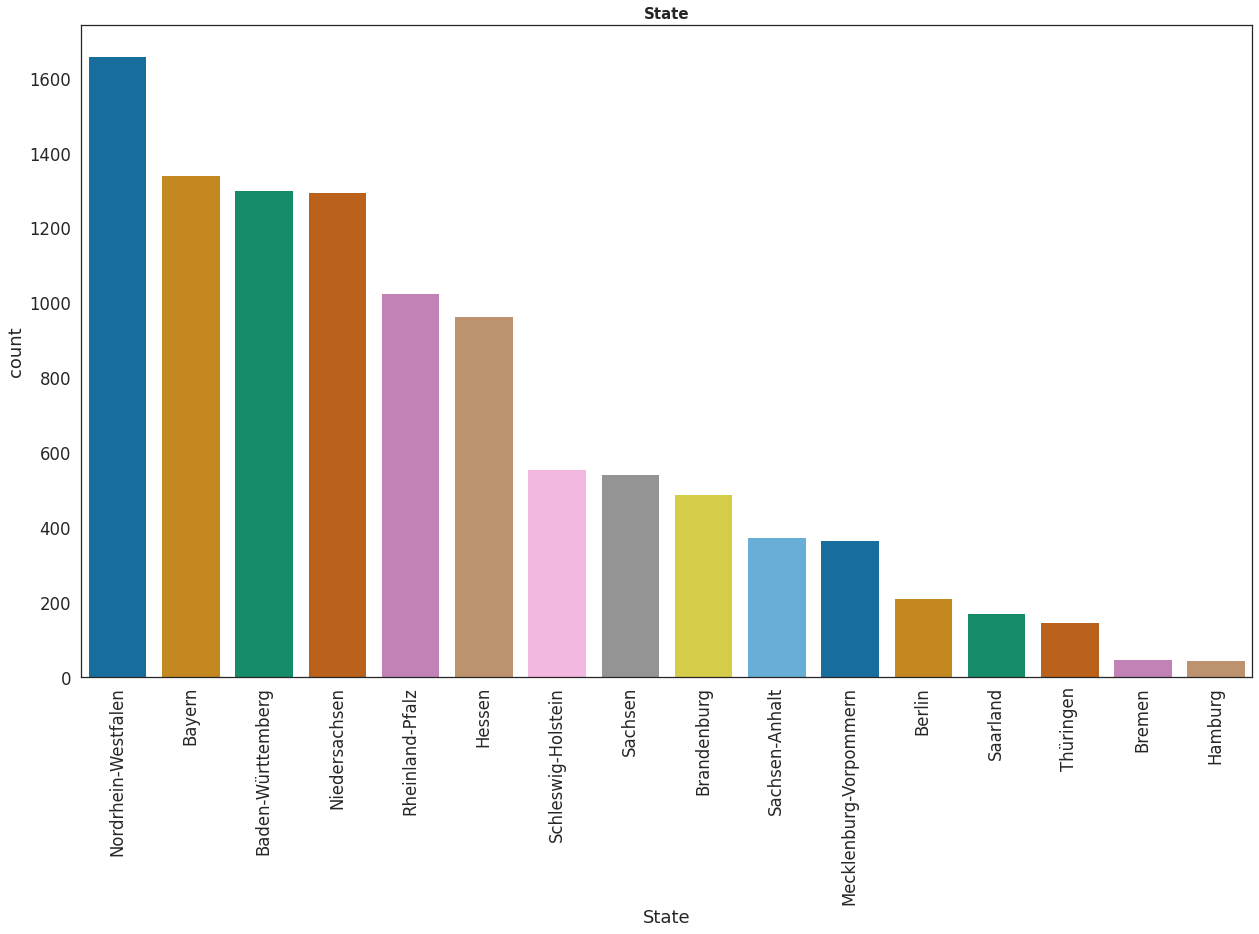

In [1032]:
# plot all energy certificate types
plt.figure(figsize=(21,12)) 
plt.title('State', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['State'], data=df, palette=colorblind_palette, order=df['State'].value_counts().iloc[:].index)

### City                     

<AxesSubplot:title={'center':'City'}, xlabel='City', ylabel='count'>

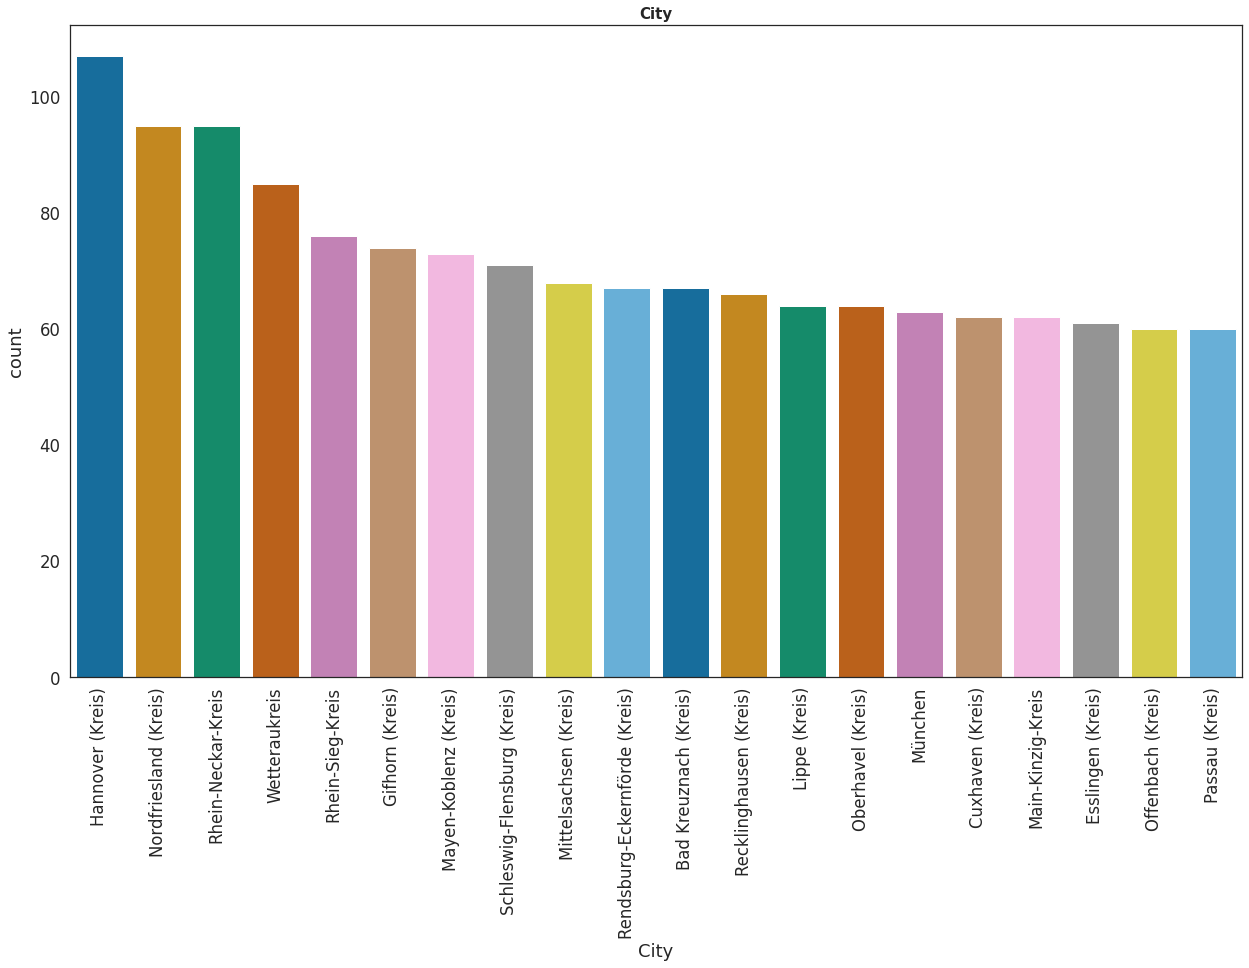

In [1033]:
# plot first 20 cites
plt.figure(figsize=(21,12)) 
plt.title('City', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['City'], data=df, palette=colorblind_palette, order=df['City'].value_counts().iloc[:20].index)

### Place

<AxesSubplot:title={'center':'Place'}, xlabel='Place', ylabel='count'>

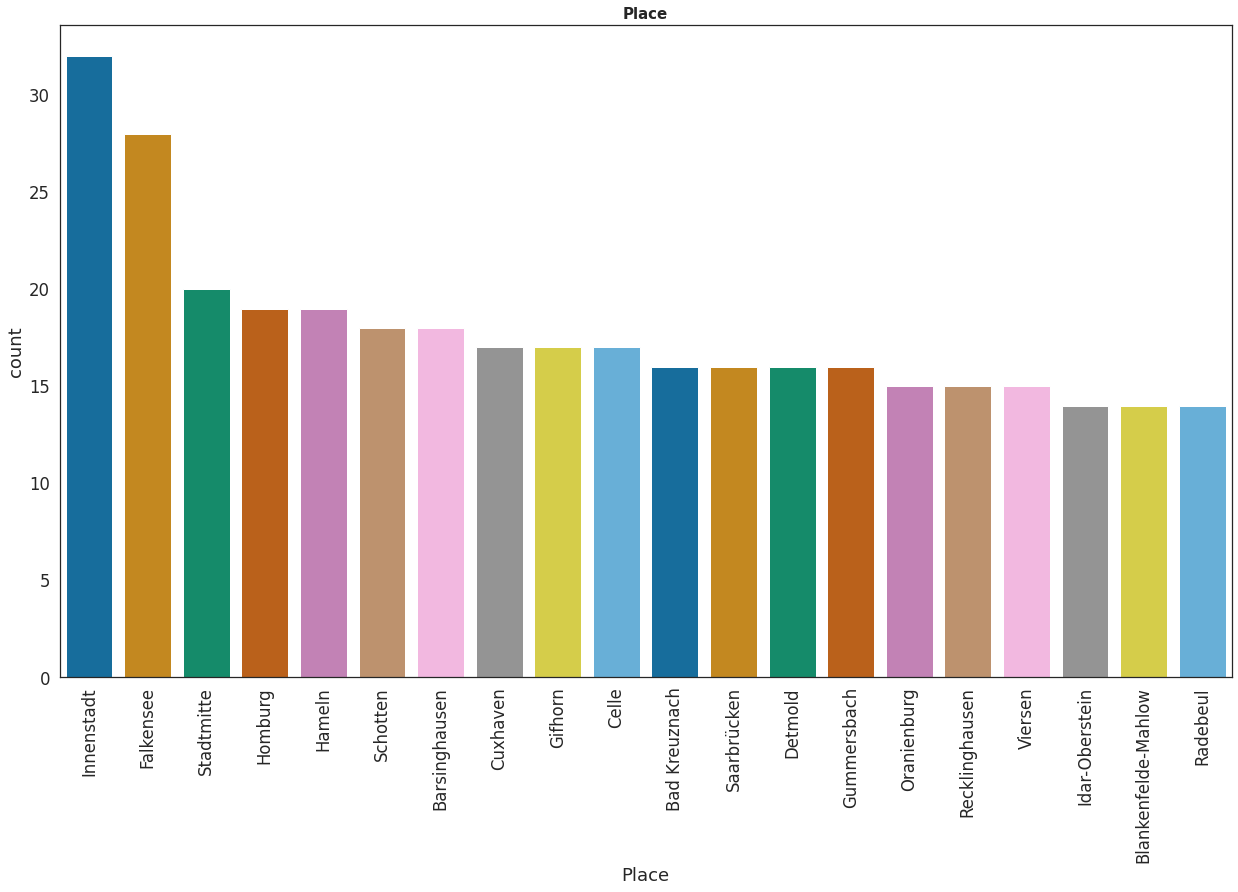

In [1034]:
# plot first 20 places
plt.figure(figsize=(21,12)) 
plt.title('Place', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Place'], data=df, palette=colorblind_palette, order=df['Place'].value_counts().iloc[:20].index)

### Garages

<AxesSubplot:title={'center':'Garages'}, xlabel='Garages', ylabel='count'>

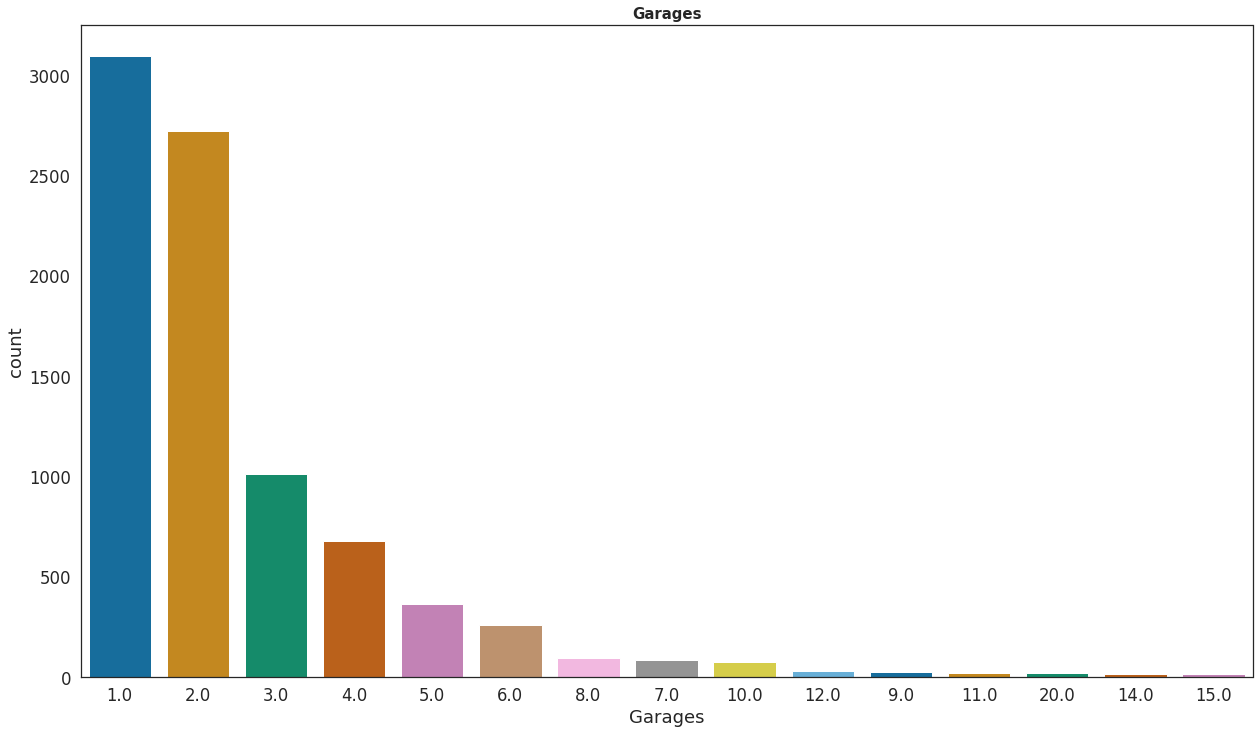

In [1035]:
# plot first 15 records
plt.figure(figsize=(21,12)) 
plt.title('Garages', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Garages'], data=df, palette=colorblind_palette, order=df['Garages'].value_counts().iloc[:15].index)

### Garagetype      

<AxesSubplot:title={'center':'Garagetype'}, xlabel='Garagetype', ylabel='count'>

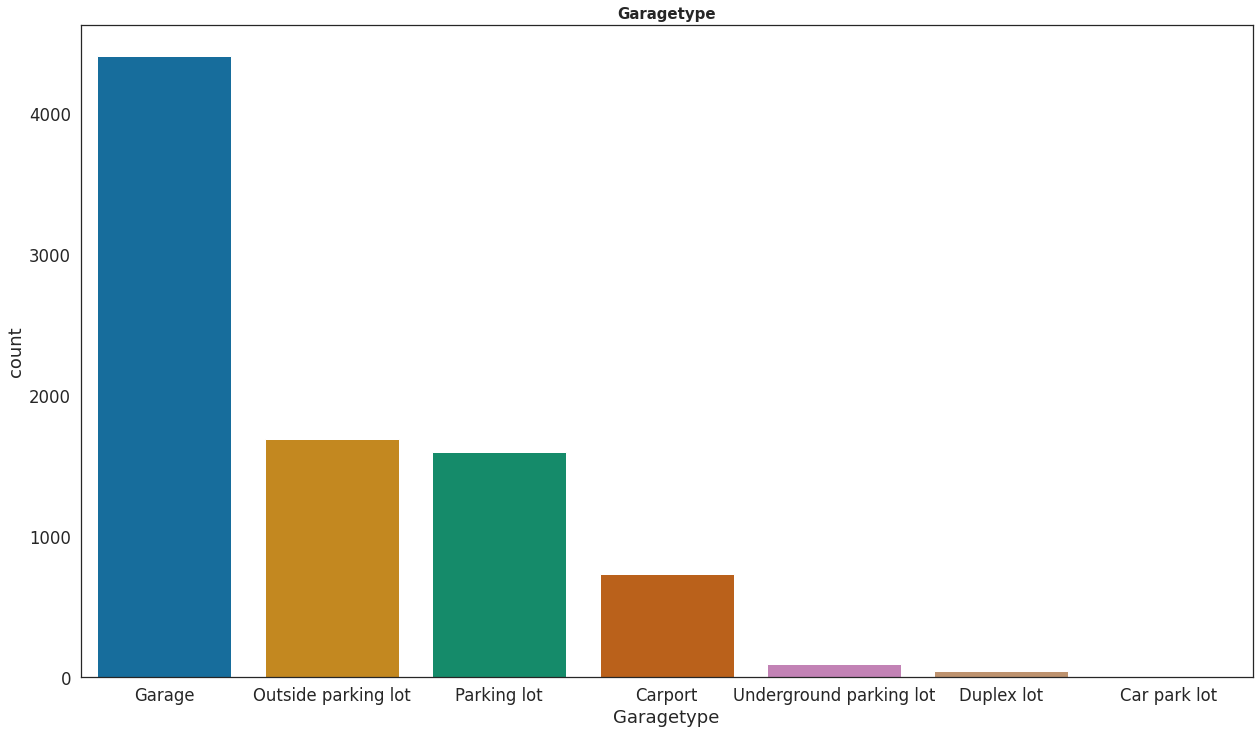

In [1036]:
# plot first 20 garage types
plt.figure(figsize=(21,12)) 
plt.title('Garagetype', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Garagetype'], data=df, palette=colorblind_palette, order=df['Garagetype'].value_counts().iloc[:].index)

## Analytical questions

### What does influence the most property prices?

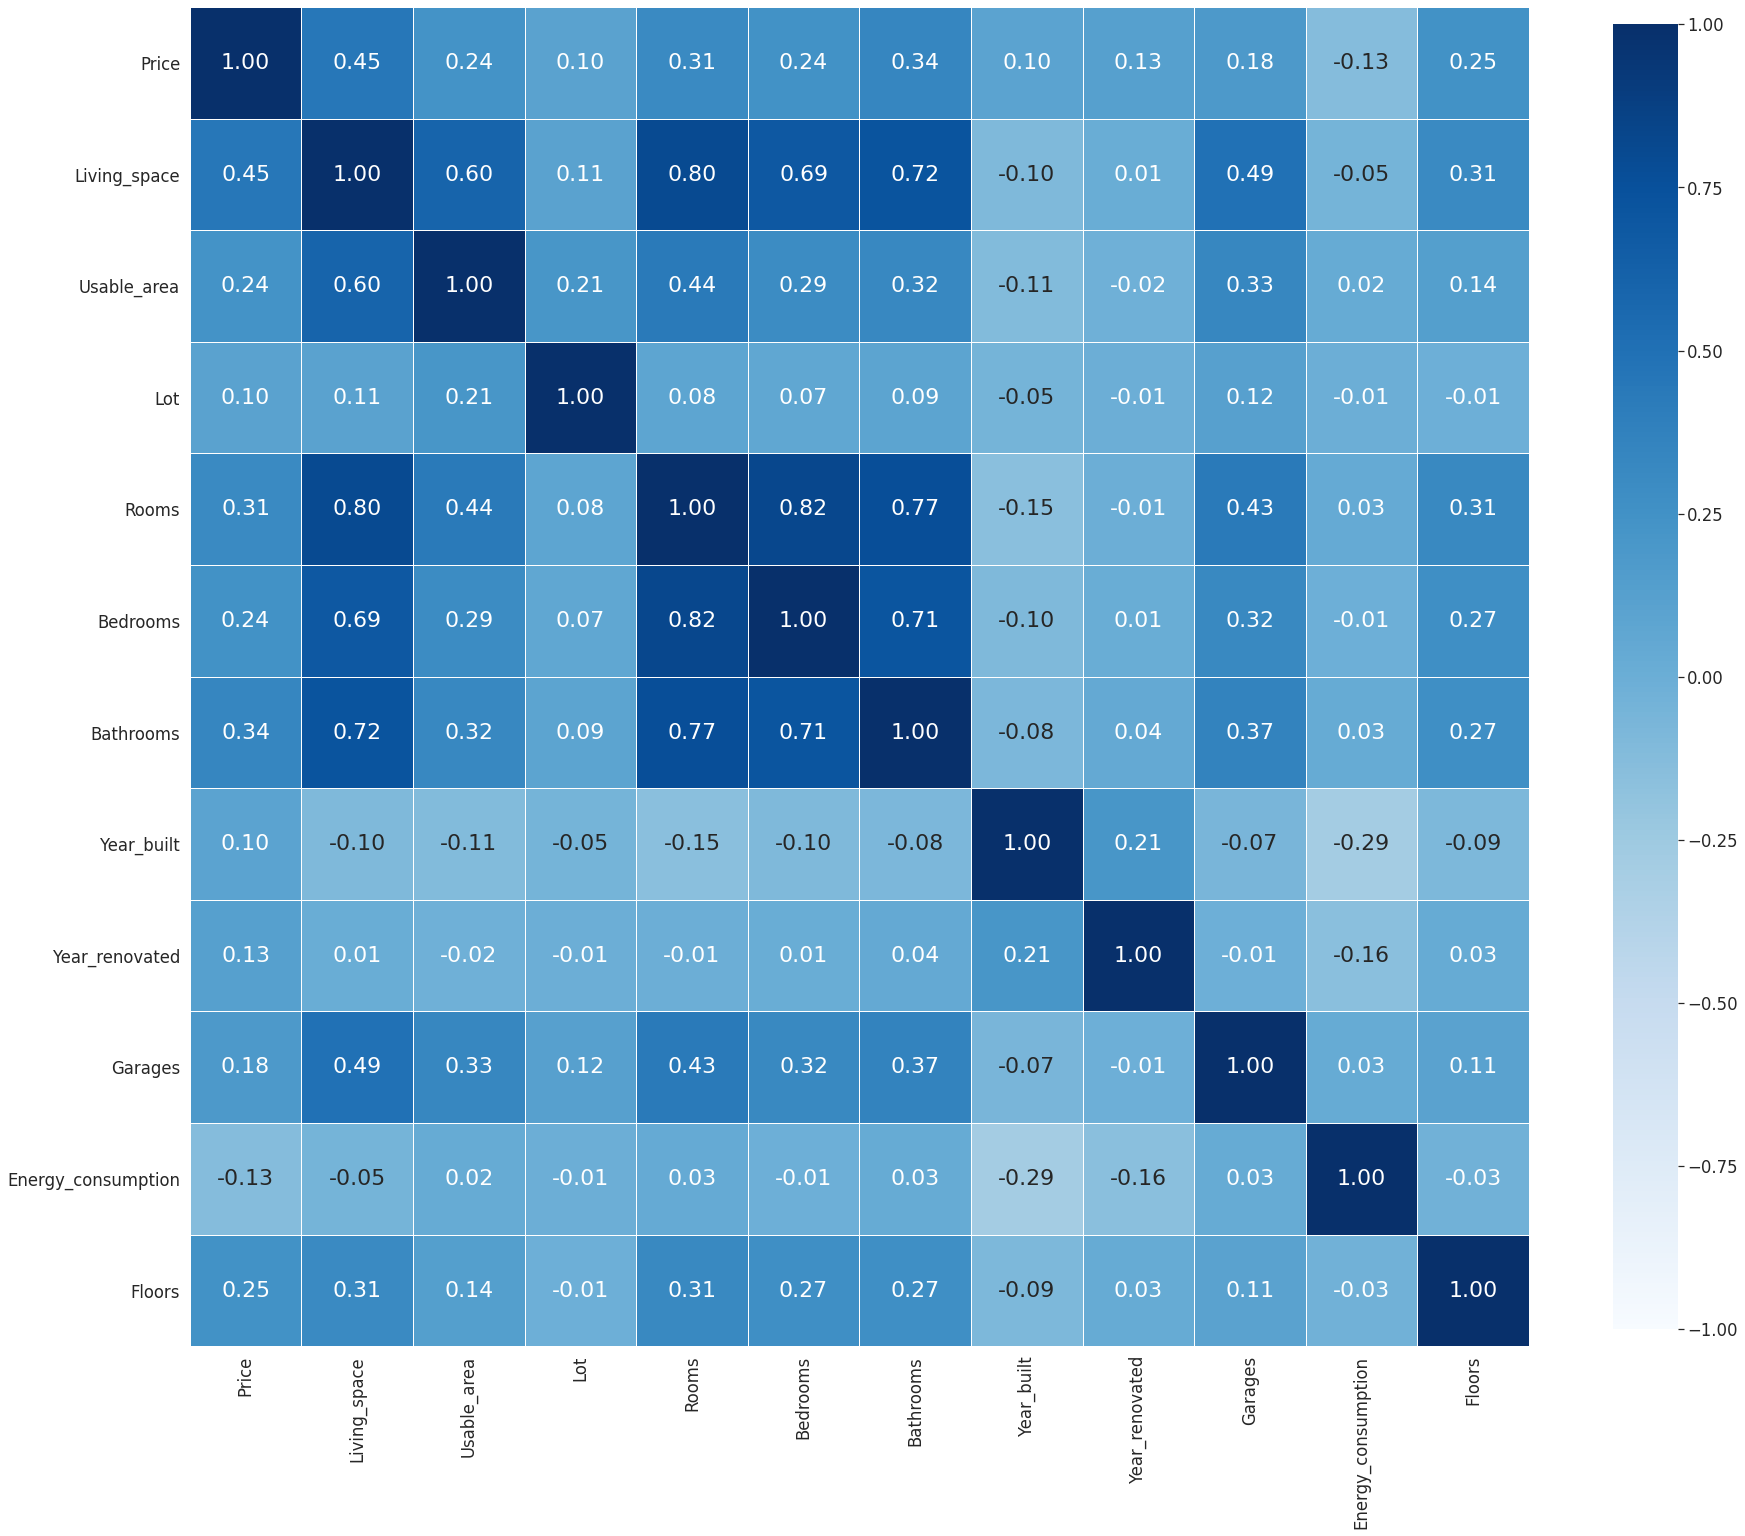

In [1037]:
# plot heatmap
fig, ax = plt.subplots(figsize=(30, 30))
corr_data = df[['Price', 'Living_space', 'Usable_area', 'Lot', 'Rooms', 'Bedrooms', 'Bathrooms', 'Year_built', 'Year_renovated', 'Garages', 'Energy_consumption', 'Floors']].copy()
correlations = corr_data.corr() 
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8}, linewidths=.7, annot_kws={'fontsize':22})
plt.show()

In [1038]:
# categorize rooms
rooms_ef = pd.qcut(df['Rooms'], 5, precision=0).astype(str)

In [1039]:
# categorize bathrooms
bathrooms_ef = pd.qcut(df['Bathrooms'], 2, precision=0, duplicates='drop').astype(str)

In [1040]:
# add categorical living space column to the original dataset 
df['living_space_ef'] = living_space_ef

In [1041]:
# add categorical rooms column to the original dataset 
df['rooms_ef'] = rooms_ef

In [1042]:
# add categorical bathrooms column to the original dataset 
df['bathrooms_ef'] = bathrooms_ef

In [1043]:
# add categorical price column to the original dataset 
df['price_ef'] = price_ef

In [1044]:
 df_price_living_space = pd.DataFrame({
  'price_ef': price_ef,
  'living_space_ef': living_space_ef,
  'rooms_ef': rooms_ef,
  'bathrooms_ef': bathrooms_ef
})

In [1045]:
# see relationship between living space and price 
hypo = cleverminer(df=df_price_living_space,proc='4ftMiner',
               quantifiers= {'pim':0.6, 'Base':50},
               ante ={
                    'attributes':[
                        {'name': 'living_space_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'rooms_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'bathrooms_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
       Column_Name  Num_Unique
0         price_ef           3
3     bathroom

In [1046]:
print(hypo)

{'taskinfo': {'task_type': '4ftMiner', 'target': None, 'self.quantifiers': {'pim': 0.6, 'Base': 50}, 'ante': {'attributes': [{'name': 'living_space_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}, {'name': 'rooms_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}, {'name': 'bathrooms_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}], 'minlen': 1, 'maxlen': 2, 'type': 'con'}, 'succ': {'attributes': [{'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}], 'minlen': 1, 'maxlen': 2, 'type': 'con'}}, 'summary_statistics': {'total_verifications': 128, 'valid_hypotheses': 7, 'time_prep': 0.2101888656616211, 'time_processing': 0.013439416885375977, 'time_total': 0.22362828254699707}, 'hypotheses': [{'hypo_id': 1, 'cedents': {'cond': '---', 'ante': 'living_space_ef((278.0, 5600.0] )', 'succ': 'price_ef(550k+ )'}, 'params': {'base': 1313, 'rel_base': 0.12444318074116198, 'pim': 0.6240494296577946, 'aad': 0.8882550996040699, 'bad': -0.8882550996040699, 'fourfold': [1313, 791, 2174, 6273]}

In [1047]:
# see relationship between living space and price with tuned parameters 
hypo = cleverminer(df=df_price_living_space,proc='4ftMiner',
               quantifiers= {'aad':0.6, 'Base':50},
               ante ={
                    'attributes':[
                        {'name': 'living_space_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'rooms_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'bathrooms_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
       Column_Name  Num_Unique
0         price_ef           3
3     bathroom

In [1048]:
print(hypo)

{'taskinfo': {'task_type': '4ftMiner', 'target': None, 'self.quantifiers': {'aad': 0.6, 'Base': 50}, 'ante': {'attributes': [{'name': 'living_space_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}, {'name': 'rooms_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}, {'name': 'bathrooms_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}], 'minlen': 1, 'maxlen': 2, 'type': 'con'}, 'succ': {'attributes': [{'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}], 'minlen': 1, 'maxlen': 2, 'type': 'con'}}, 'summary_statistics': {'total_verifications': 128, 'valid_hypotheses': 10, 'time_prep': 0.22296380996704102, 'time_processing': 0.012551307678222656, 'time_total': 0.23551511764526367}, 'hypotheses': [{'hypo_id': 1, 'cedents': {'cond': '---', 'ante': 'living_space_ef((200.0, 278.0] ) & rooms_ef((4.0, 6.0] )', 'succ': 'price_ef(550k+ )'}, 'params': {'base': 253, 'rel_base': 0.023978769784854515, 'pim': 0.5348837209302325, 'aad': 0.6184565929265511, 'bad': -0.6184565929265511, 'fourfold':

## What are the states and cities with the most expensive real estate?

In [1049]:
#  create new dataframe which consist of price and state
df_price_state = pd.DataFrame({
    'State': df['State'],
    'price_ef': price_ef 
})

In [1050]:
# find the most expensive states
hypo = cleverminer(df=df_price_state, target='price_ef', proc='CFMiner',
               quantifiers= {'S_Up':2, 'Base':50},
               cond ={
                    'attributes':[
                        {'name': 'State', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result
# hodnoty histogramu?

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
  Column_Name  Num_Unique
1    price_ef           3
0       State          1

In [1051]:
print(hypo)

{'taskinfo': {'task_type': 'CFMiner', 'target': 'price_ef', 'self.quantifiers': {'S_Up': 2, 'Base': 50}, 'cond': {'attributes': [{'name': 'State', 'type': 'subset', 'minlen': 1, 'maxlen': 1}, {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}], 'minlen': 1, 'maxlen': 2, 'type': 'con'}}, 'summary_statistics': {'total_verifications': 32, 'valid_hypotheses': 4, 'time_prep': 0.24457621574401855, 'time_processing': 0.0015096664428710938, 'time_total': 0.24608588218688965}, 'hypotheses': [{'hypo_id': 1, 'cedents': {'cond': 'State(Baden-Württemberg )'}, 'params': {'base': 1303, 'rel_base': 0.12349540327931002, 's_up': 2, 's_down': 0, 's_any_up': 2, 's_any_down': 0, 'max': 677, 'min': 201, 'rel_max': 0.0641645341673775, 'rel_min': 0.019050326983224338, 'hist': [201, 425, 677]}, 'trace_cedent': [], 'traces': []}, {'hypo_id': 2, 'cedents': {'cond': 'State(Bayern )'}, 'params': {'base': 1341, 'rel_base': 0.12709695763434745, 's_up': 2, 's_down': 0, 's_any_up': 2, 's_any_down': 0, 'max

In [1052]:
# load dataset with German citie & select the biggest 30 ones
df_cities = pd.read_csv('german-cities.csv')
biggest_cities_list = df_cities['city'].head(30).tolist()
biggest_cities_list
df_biggest_cities = pd.DataFrame(df.loc[df['City'].isin(biggest_cities_list)])

In [1053]:
#  create new dataframe which consist of price and cities
df_cities_price = pd.DataFrame({
    'City': df_biggest_cities['City'],
    'price_ef': df_biggest_cities['price_ef'] 
})

In [1054]:
df_cities_price

,City,price_ef
5,Stuttgart,550k+
9,Mannheim,550k+
10,Stuttgart,550k+
13,Mannheim,550k+
15,Stuttgart,550k+
...,...,...
10045,Kiel,299 and less
10233,Kiel,300-550k
10241,Kiel,300-550k
10280,Kiel,300-550k


In [1055]:
# find the most expensive cities
hypo = cleverminer(df=df_cities_price, target='price_ef', proc='CFMiner',
               quantifiers= {'S_Up':2, 'Base':20},
               cond ={
                    'attributes':[
                        {'name': 'City', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
  Column_Name  Num_Unique
1    price_ef           3
0        City          2

In [1056]:
print(hypo)

{'taskinfo': {'task_type': 'CFMiner', 'target': 'price_ef', 'self.quantifiers': {'S_Up': 2, 'Base': 20}, 'cond': {'attributes': [{'name': 'City', 'type': 'subset', 'minlen': 1, 'maxlen': 1}, {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}], 'minlen': 1, 'maxlen': 2, 'type': 'con'}}, 'summary_statistics': {'total_verifications': 34, 'valid_hypotheses': 7, 'time_prep': 0.023345947265625, 'time_processing': 0.0004878044128417969, 'time_total': 0.023833751678466797}, 'hypotheses': [{'hypo_id': 1, 'cedents': {'cond': 'City(Bonn )'}, 'params': {'base': 28, 'rel_base': 0.05870020964360587, 's_up': 2, 's_down': 0, 's_any_up': 2, 's_any_down': 0, 'max': 23, 'min': 0, 'rel_max': 0.04821802935010482, 'rel_min': 0.0, 'hist': [0, 5, 23]}, 'trace_cedent': [], 'traces': []}, {'hypo_id': 2, 'cedents': {'cond': 'City(Dortmund )'}, 'params': {'base': 32, 'rel_base': 0.06708595387840671, 's_up': 2, 's_down': 0, 's_any_up': 2, 's_any_down': 0, 'max': 18, 'min': 4, 'rel_max': 0.0377358490566

 ## Stav mezi kvalitou nábytku a cenami nemovitostí?

In [1057]:
#  create new dataframe which consist of price and furniture
df_furniture_price = pd.DataFrame({
    'price_ef': df['price_ef'],
    'City': df_biggest_cities['City'],
    'Furnishing_quality': df_biggest_cities['Furnishing_quality']
})

In [1058]:
df_biggest_cities['City']

5        Stuttgart
9         Mannheim
10       Stuttgart
13        Mannheim
15       Stuttgart
           ...    
10045         Kiel
10233         Kiel
10241         Kiel
10280         Kiel
10543    Wiesbaden
Name: City, Length: 477, dtype: object

In [1059]:
# see relationship between living price and furniture
hypo = cleverminer(df=df_furniture_price,proc='4ftMiner',
               quantifiers= {'aad':0.6, 'Base':10},
               ante ={
                    'attributes':[
                        {'name': 'Furnishing_quality', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
          Column_Name  Num_Unique
0            price_ef           3
2  Furni

In [1060]:
# see relationship between living price and furniture
hypo = cleverminer(df=df_furniture_price,proc='4ftMiner',
               quantifiers= {'aad':0.1, 'Base':10},
               ante ={
                    'attributes':[
                        {'name': 'price_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'Furnishing_quality', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
          Column_Name  Num_Unique
0            price_ef           3
2  Furni

## Jak souvisí energetická třída s cenou?

In [1102]:
df_biggest_cities.dropna(subset = ['Energy_efficiency_class'], inplace=True)

In [1103]:
#  create new dataframe which consist of price and furniture
df_energy_price = pd.DataFrame({
    'price_ef': df_biggest_cities['price_ef'],
    'Energy_efficiency_class': df_biggest_cities['Energy_efficiency_class'],
    'City': df_biggest_cities['City']
})

In [1104]:
# see relationship between living price and furniture
hypo = cleverminer(df=df_energy_price,proc='4ftMiner',
               quantifiers= {'aad':0.1, 'Base':10},
               ante ={
                    'attributes':[
                        {'name': 'price_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'Energy_efficiency_class', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
               Column_Name  Num_Unique
0                 price_ef           

In [1105]:
# see relationship between living price and furniture
hypo = cleverminer(df=df_energy_price,proc='4ftMiner',
               quantifiers= {'aad':0.1, 'Base':10},
               ante ={
                    'attributes':[
                        {'name': 'Energy_efficiency_class', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
               Column_Name  Num_Unique
0                 price_ef           

In [1118]:
# see relationship between living price and furniture
hypo = cleverminer(df=df_energy_price,proc='SD4ftMiner',
               quantifiers= {'Base1':1, 'Base2':1, 'Ratiopim' : 0.1},
               ante ={
                    'attributes':[
                        {'name': 'price_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'Energy_efficiency_class', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               frst ={
                    'attributes':[
                        {'name': 'City', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               scnd ={
                    'attributes':[
                        {'name': 'City', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'}
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
               Column_Name  Num_Unique
0                 price_ef           

## Jak souvisí rok renovace s cenou nemovitosti?

In [1071]:
df.dropna(subset = ['Year_renovated'], inplace=True)
df.dropna(subset = ['Year_built'], inplace=True)
df = df[df.Year_renovated < 2025]
df['Year_difference'] = df['Year_renovated'] - df['Year_built']
year_intervals = ['(95.0, 150.0]', '(41.0, 59.0]', '(59.0, 95.0]', '(23.0, 41.0]',
       '(0, 23.0]']
year_diff_ef = pd.qcut(df['Year_difference'], 5, precision=0, labels=year_intervals).astype(str)

In [1072]:
#  create new dataframe which consist of price and renovation year
# odecist year_renovated or year_Created a pouzit 4sdft miner, 
df_year_renovated_price = pd.DataFrame({
    'price_ef': df['price_ef'],
    'year_diff_ef': year_diff_ef
})

In [1073]:
df['Year_built']

3        1900.0
4        1968.0
8        1809.0
10       1939.0
15       1914.0
          ...  
10541    1978.0
10545    2000.0
10546    2009.0
10547    1976.0
10548    2017.0
Name: Year_built, Length: 4994, dtype: float64

In [1074]:
df_year_renovated_price

,price_ef,year_diff_ef
3,299 and less,"(0, 23.0]"
4,300-550k,"(59.0, 95.0]"
8,300-550k,"(0, 23.0]"
10,550k+,"(23.0, 41.0]"
15,550k+,"(23.0, 41.0]"
...,...,...
10541,550k+,"(95.0, 637.0]"
10545,550k+,"(95.0, 637.0]"
10546,550k+,"(95.0, 637.0]"
10547,550k+,"(41.0, 59.0]"


In [1075]:
year_diff_ef.unique()

array(['(0, 23.0]', '(59.0, 95.0]', '(23.0, 41.0]', '(41.0, 59.0]',
       '(95.0, 637.0]'], dtype=object)

In [1076]:
# see relationship between living price and renovation year
hypo = cleverminer(df=df_year_renovated_price, target='price_ef',proc='CFMiner',
               quantifiers= {'S_Up':0.6, 'Base':80},
               cond ={
                    'attributes':[
                        {'name': 'year_diff_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'},
               ).result

***********************************************************************************************************************************************************************
Cleverminer version  0.0.85
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************
Starting data preparation ...
Unique value counts are:
    Column_Name  Num_Unique
0      price_ef           3
1  year_diff_ef     

In [1066]:
print(hypo)

{'taskinfo': {'task_type': 'CFMiner', 'target': 'price_ef', 'self.quantifiers': {'S_Up': 0.6, 'Base': 80}, 'cond': {'attributes': [{'name': 'year_diff_ef', 'type': 'subset', 'minlen': 1, 'maxlen': 1}, {'name': 'price_ef', 'type': 'rcut', 'minlen': 1, 'maxlen': 1}], 'minlen': 1, 'maxlen': 2, 'type': 'con'}}, 'summary_statistics': {'total_verifications': 11, 'valid_hypotheses': 9, 'time_prep': 0.05566883087158203, 'time_processing': 0.0007283687591552734, 'time_total': 0.056397199630737305}, 'hypotheses': [{'hypo_id': 1, 'cedents': {'cond': 'year_diff_ef((-31.0, 23.0] )'}, 'params': {'base': 1039, 'rel_base': 0.2080496595915098, 's_up': 2, 's_down': 0, 's_any_up': 2, 's_any_down': 0, 'max': 442, 'min': 197, 'rel_max': 0.08850620744893872, 'rel_min': 0.039447336804165, 'hist': [197, 400, 442]}, 'trace_cedent': [], 'traces': []}, {'hypo_id': 2, 'cedents': {'cond': 'year_diff_ef((-31.0, 23.0] ) & price_ef(550k+ )'}, 'params': {'base': 442, 'rel_base': 0.08850620744893872, 's_up': 1, 's_down

In [1067]:
## Jak souvisí energetický třída s cenou nemovitosti?